# Prediction of Obesity Risk

### About Dataset

The dataset at hand is a comprehensive collection aimed at estimating obesity levels in individuals from Mexico, Peru, and Colombia. Consisting of 2111 records and 17 attributes, the information was gathered through a web platform survey where participants, maintaining anonymity, responded to a series of questions. The attributes cover a spectrum of factors, providing insights into both eating habits and physical conditions. Among the key attributes related to eating habits are the frequency of consuming high-caloric food, the intake of vegetables, the number of main meals, consumption of food between meals, daily water consumption, and alcohol consumption. In tandem, physical condition attributes include monitoring of calorie consumption, the frequency of physical activity, time spent using technology devices, and the mode of transportation used. The dataset incorporates demographic details such as gender, age, height, and weight. The target variable, NObesity, classifies individuals into categories such as underweight, normal weight, overweight, and various levels of obesity. The dataset's geographic scope spans three countries, allowing for the exploration of diverse eating habits and physical conditions within the surveyed population. The overarching objective is to utilize this dataset for classification, clustering, or regression analyses, shedding light on the intricate interplay of these attributes in influencing obesity levels.



### Data Overview:

1. The dataset focuses on estimating obesity levels in individuals from Mexico, Peru, and Colombia.
2. It includes 17 attributes and 2111 records collected through a web platform survey.

#### Age and Demographics:

1. The individuals surveyed range from 14 to 61 years old.
2. The dataset includes information on gender, age, height, and weight.

#### Eating Habits Attributes:

1. Attributes related to eating habits include:
2. Frequent consumption of high-caloric food (FAVC)
3. Frequency of consumption of vegetables (FCVC)
4. Number of main meals (NCP)
5. Consumption of food between meals (CAEC)
6. Consumption of water daily (CH20)
7. Consumption of alcohol (CALC)

#### Physical Condition Attributes:

###### Attributes related to physical condition include:

1. Calories consumption monitoring (SCC)
2. Physical activity frequency (FAF)
3. Time using technology devices (TUE)
4. Transportation used (MTRANS)

#### Target Variable (NObesity):

1. The target variable for classification is NObesity, representing obesity levels.

#### NObesity values and corresponding classifications:

1. Underweight: Less than 18.5
2. Normal: 18.5 to 24.9
3. Overweight: 25.0 to 29.9
4. Obesity I: 30.0 to 34.9
5. Obesity II: 35.0 to 39.9
6. Obesity III: Higher than 40

#### Objective of the Dataset:

1. The dataset enables classification, clustering, or regression tasks based on the values of NObesity.
2. The goal is to understand how eating habits and physical condition attributes contribute to different obesity levels.

#### Geographical Scope:

1. Data is collected from individuals in Mexico, Peru, and Colombia.
2. The dataset captures diverse eating habits and physical conditions among the surveyed population.

#### Data Collection Process:

1. Collected through a web platform survey where anonymous users responded to questions.
2. Information processed to derive 17 attributes relevant to obesity estimation.

#### Obesity Level Classifications:

1. Individuals are categorized into obesity levels, ranging from insufficient weight to various degrees of obesity.

#### Potential Analyses:

1. The dataset allows for various analyses, such as classification, clustering to understand patterns related to obesity.
2. Insights may be gained into how specific attributes influence different obesity levels in the surveyed population.


#### Dataset source: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/data

#

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()
sns.set_style('darkgrid')
sns.set_palette('Blues_r')

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing dataset

obs = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Casestudy/Prediction_of_Obesity_Risk/Prediction_of_Obesity_Risk/ObesityDataSet.csv")


obs.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


###### "NObeyesdad" is the 'y_variable' for classification modelling

In [3]:
# Getting information about the data

obs.info()

# 17 attributes availables in the data
# No nulls available in the data
# Dtypes contains both "object" and 'float64'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
# Duplicate observations checking and dropping duplicates (in any)

print("Number of duplicate observations in available in the data :", obs.duplicated().sum())


obs.drop_duplicates(inplace=True)

Number of duplicate observations in available in the data : 24


In [5]:
# -----Seprating categorical and continous data

cont_data = obs.select_dtypes(['float'])
cat_data = obs.select_dtypes(['object'])

# Dropping variable "NObeyesdad" from cat_data as "NObeyesdad" is y_variable

cat_data.drop(columns='NObeyesdad', inplace=True)

In [6]:
cont_data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [7]:
cat_data.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation


###### EDA of y_variable "NObeyesdad"

In [8]:
print(obs.NObeyesdad.value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64


In [9]:
obs_y_var_chart = pd.DataFrame(obs.NObeyesdad.value_counts())

obs_y_var_chart.columns = ['count_of_NObeyesdad']

obs_y_var_chart

,count_of_NObeyesdad
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,290
Normal_Weight,282
Overweight_Level_I,276
Insufficient_Weight,267


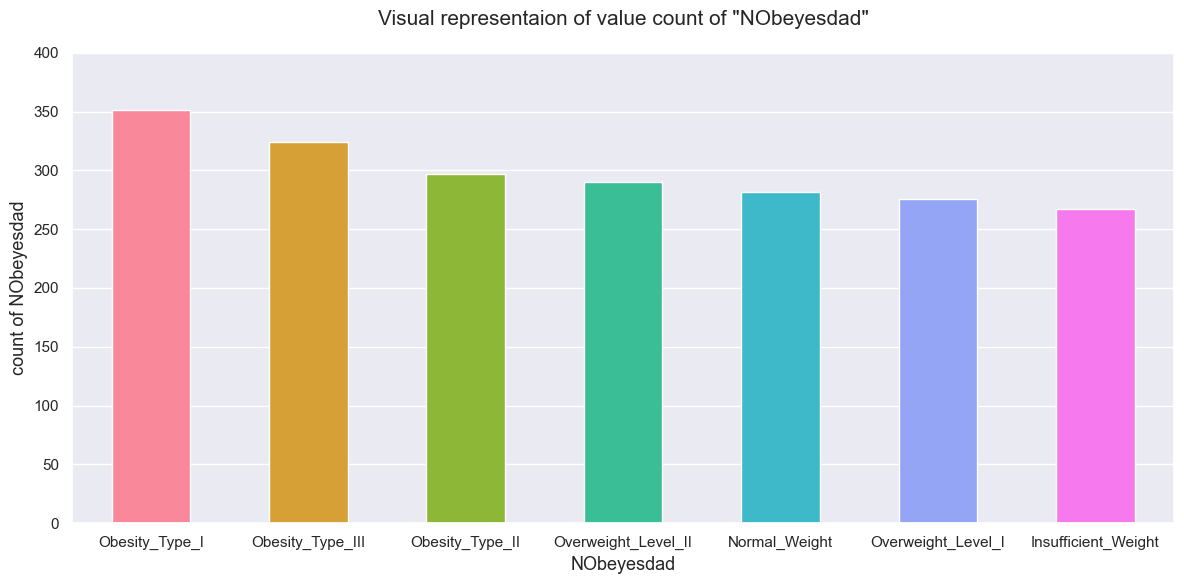

In [10]:
# Visualization of count of y_variable

plt.figure(figsize=(12,6))
sns.barplot(x= obs_y_var_chart.index, 
            y=obs_y_var_chart.count_of_NObeyesdad
            ,width=0.5
            ,saturation=1)
plt.title('Visual representaion of value count of "NObeyesdad"', fontdict={'fontsize':15}, pad=20)
plt.ylabel('count of NObeyesdad', fontdict={'fontsize':13})
plt.xlabel('NObeyesdad', fontdict={'fontsize':13})
plt.yticks(np.arange(0,450, 50))
plt.tight_layout()
plt.show()

###### EDA on cat_data

In [11]:
cat_data.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation


In [12]:
# Getting info about cat_data

cat_data.info()

# 8 variables are categorical in nature

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2087 non-null   object
 1   family_history_with_overweight  2087 non-null   object
 2   FAVC                            2087 non-null   object
 3   CAEC                            2087 non-null   object
 4   SMOKE                           2087 non-null   object
 5   SCC                             2087 non-null   object
 6   CALC                            2087 non-null   object
 7   MTRANS                          2087 non-null   object
dtypes: object(8)
memory usage: 146.7+ KB


In [13]:
# Describing cat_data

cat_data.describe().T


# unique value count of all categorical variables are on lower side

,count,unique,top,freq
Gender,2087,2,Male,1052
family_history_with_overweight,2087,2,yes,1722
FAVC,2087,2,yes,1844
CAEC,2087,4,Sometimes,1761
SMOKE,2087,2,no,2043
SCC,2087,2,no,1991
CALC,2087,4,Sometimes,1380
MTRANS,2087,5,Public_Transportation,1558


In [14]:
# Printing unique values of each categorical variable

for i in cat_data.columns:
    print(i, ':', cat_data[i].unique())
    print('')
    print('_________________________________')

Gender : ['Female' 'Male']

_________________________________
family_history_with_overweight : ['yes' 'no']

_________________________________
FAVC : ['no' 'yes']

_________________________________
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']

_________________________________
SMOKE : ['no' 'yes']

_________________________________
SCC : ['no' 'yes']

_________________________________
CALC : ['no' 'Sometimes' 'Frequently' 'Always']

_________________________________
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

_________________________________


In [15]:
print(list(cat_data.columns))

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


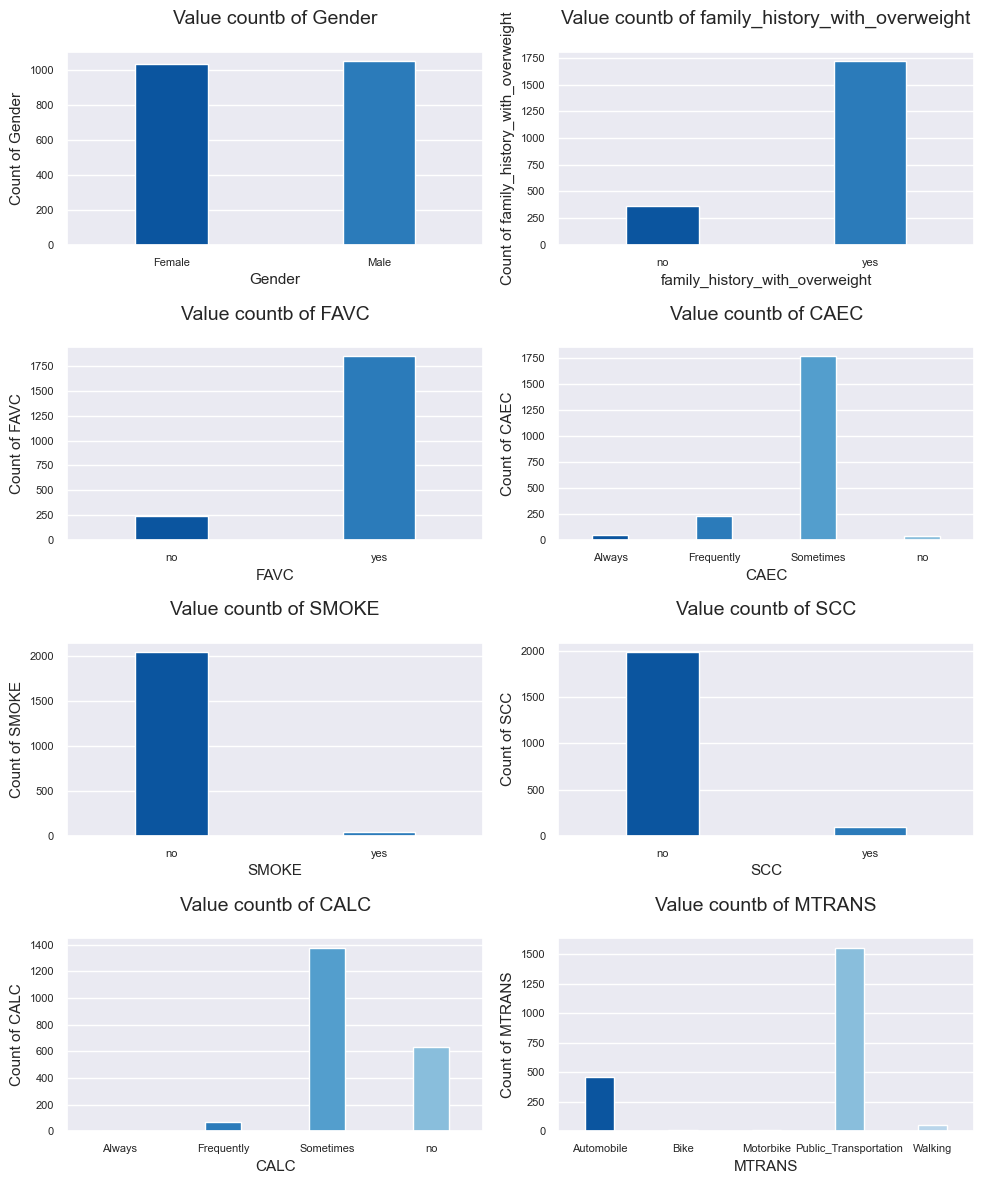

In [16]:
# Visualization of cat_data

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,12))

# Flatten the 2D array 
axes = axes.flatten()

for j, i in enumerate(cat_data):
    cat_visaul_df = cat_data.groupby([i])[[i]].count()
    
    sns.barplot(x=cat_visaul_df.index,
               y=cat_visaul_df[i],
                saturation=1,
                width=0.35
                , ax=axes[j])
    axes[j].set_title(f"Value countb of {i}", pad=20, fontdict={'fontsize':14})
    axes[j].set_ylabel(f"Count of {i}", fontdict={'fontsize':11})
    axes[j].set_xlabel(f"{i}", fontdict={'fontsize':11})
    axes[j].tick_params(axis='both', labelsize=8)
    axes[j].tick_params(axis='both', labelsize=8)

    
plt.tight_layout()
plt.show()

In [17]:
# Creating dummies for cat_data

cat_data = pd.get_dummies(cat_data, drop_first=True).astype(int)


cat_data.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0
2,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [18]:
cat_data.corr()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
Gender_Male,1.000000,0.113492,0.061220,-0.117901,0.085336,0.024323,0.045501,-0.102435,0.035742,-0.041754,0.027919,0.057541,0.045731,-0.163790,0.043530
family_history_with_overweight_yes,0.113492,1.000000,0.214329,-0.273727,0.316112,-0.119756,0.014885,-0.193947,-0.026325,-0.012389,0.022557,-0.016924,-0.053587,-0.050796,-0.065995
FAVC_yes,0.061220,0.214329,1.000000,-0.181711,0.201799,-0.053114,-0.050713,-0.191277,-0.056833,0.137872,-0.119911,-0.082293,-0.035470,0.025433,-0.173427
CAEC_Frequently,-0.117901,-0.273727,-0.181711,1.000000,-0.829896,-0.047971,0.042385,0.116603,0.067937,-0.128037,0.102162,-0.020714,0.078486,0.068937,0.045154
CAEC_Sometimes,0.085336,0.316112,0.201799,-0.829896,1.000000,-0.312245,-0.056288,-0.170136,-0.103108,0.121479,-0.082158,0.002133,-0.078045,-0.053498,-0.085761
CAEC_no,0.024323,-0.119756,-0.053114,-0.047971,-0.312245,1.000000,0.005559,0.091831,0.015306,0.027114,-0.033726,-0.007794,-0.009779,0.036548,0.023232
SMOKE_yes,0.045501,0.014885,-0.050713,0.042385,-0.056288,0.005559,1.000000,0.047384,0.102336,0.013429,-0.053684,-0.008514,0.035380,-0.021830,0.017500
SCC_yes,-0.102435,-0.193947,-0.191277,0.116603,-0.170136,0.091831,0.047384,1.000000,0.060727,-0.040976,0.018608,0.026823,0.047195,0.012270,0.049550
CALC_Frequently,0.035742,-0.026325,-0.056833,0.067937,-0.103108,0.015306,0.102336,0.060727,1.000000,-0.260271,-0.123336,-0.010807,-0.013561,-0.087223,0.019193
CALC_Sometimes,-0.041754,-0.012389,0.137872,-0.128037,0.121479,0.027114,0.013429,-0.040976,-0.260271,1.000000,-0.924964,-0.011008,-0.017807,0.092614,-0.046567


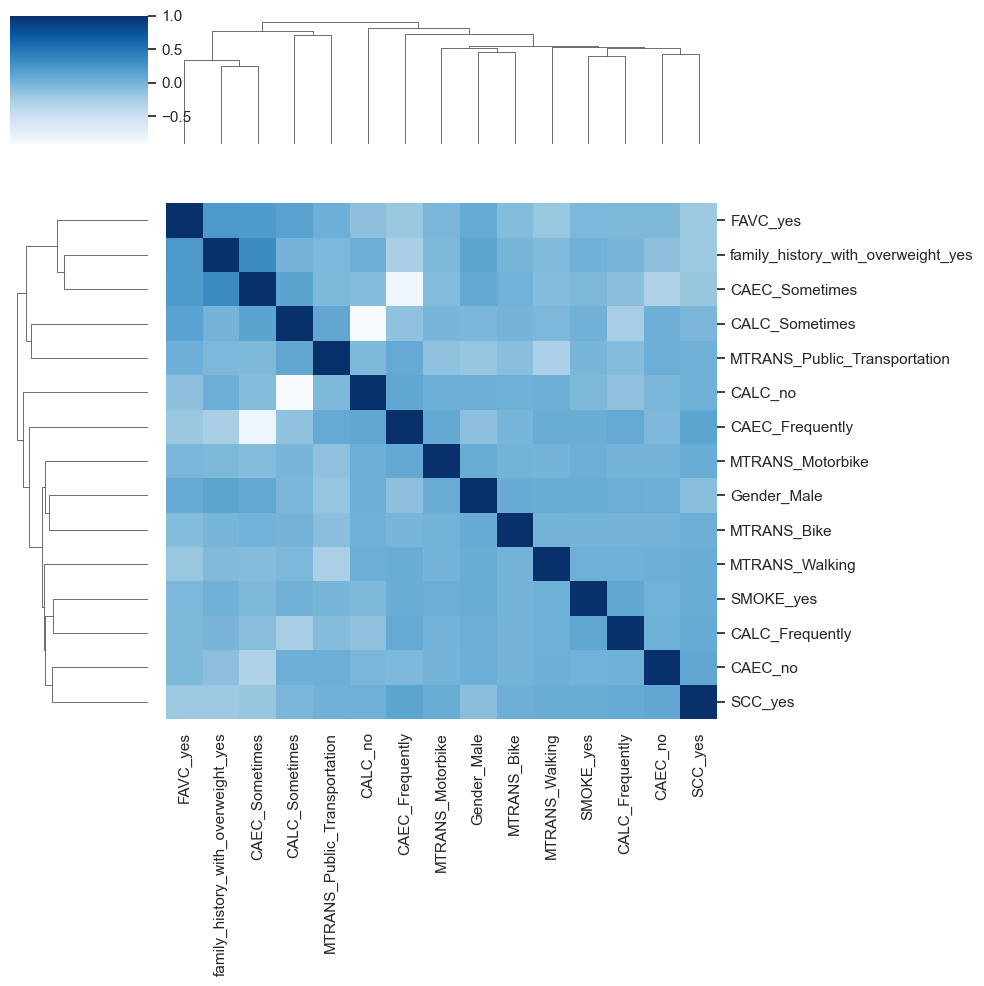

In [19]:
# Visualization of correlationship between the variables in the cat_data

sns.clustermap(cat_data.corr(),cmap='Blues')
plt.tight_layout()
plt.show()


# As per below chart CAEC_Sometimes and CAEC_Frequently are highly inversely corellated
# As per below chart CALC_Sometimes and CALC_no are also highly inversely corellated

In [20]:
# Exporting cat_data.corr() as csv file for analysis on excel.

cat_data.corr().to_csv("C:/Users/navee/OneDrive/Desktop/Casestudy/Prediction_of_Obesity_Risk/Prediction_of_Obesity_Risk/cat_data_corr.csv")

In [21]:
# Exporting cat_data as csv file to keep a copy of cleaned cat_data.

cat_data.to_csv("C:/Users/navee/OneDrive/Desktop/Casestudy/Prediction_of_Obesity_Risk/Prediction_of_Obesity_Risk/cat_data.csv")

###### EDA on cont_data

In [22]:
cont_data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [23]:
cont_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2087 non-null   float64
 1   Height  2087 non-null   float64
 2   Weight  2087 non-null   float64
 3   FCVC    2087 non-null   float64
 4   NCP     2087 non-null   float64
 5   CH2O    2087 non-null   float64
 6   FAF     2087 non-null   float64
 7   TUE     2087 non-null   float64
dtypes: float64(8)
memory usage: 146.7 KB


In [24]:
# Creating UDF for continuous variables

def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), (x.std() / x.mean()) * 100, 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var', 'Coff_of_var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p99', 'max']) 

In [25]:
cont_data.apply(lambda x: continuous_var_summary(x))

# Outlier treatment is required on the data
# "Coff_of_var" of all continuous variables is high.

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
dtype,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,1402,1574,1525,810,635,1268,1190,1129
n_tot,2087,2087,2087,2087,2087,2087,2087,2087
n,2087,2087,2087,2087,2087,2087,2087,2087
nmiss,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,50824.898407,3553.480893,181274.168705,5053.599903,5637.360813,4183.912074,2113.738436,1383.754965
mean,24.35309,1.702674,86.85873,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
var,40.561632,0.008684,685.960471,0.285943,0.584635,0.37001,0.728419,0.36985


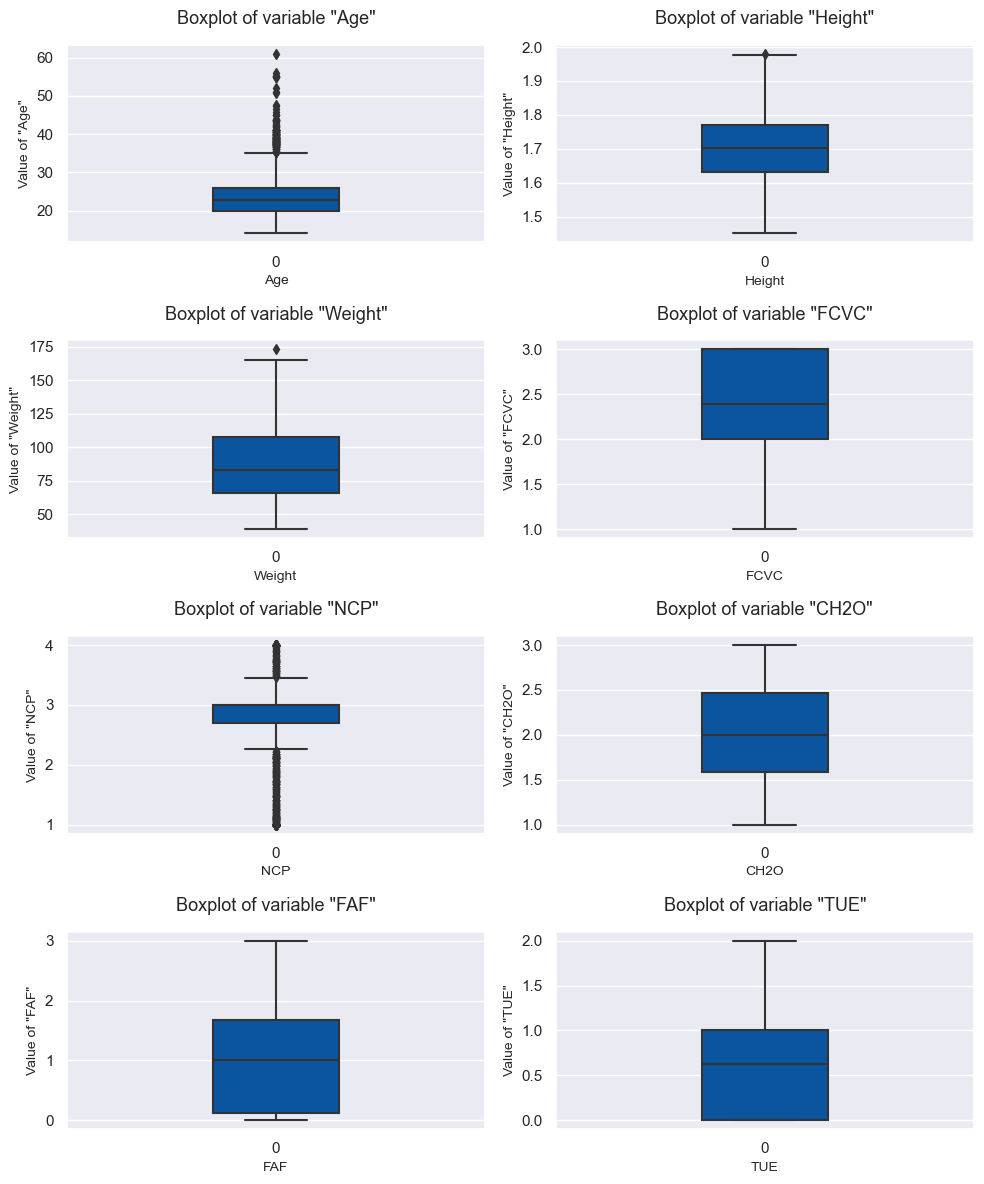

In [26]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,12))
ax = ax.flatten()

for j, i in enumerate(cont_data.columns):
    sns.boxplot(cont_data[i], saturation=1, width=0.3, ax=ax[j])
    ax[j].set_title(f'Boxplot of variable "{i}"', pad=15, fontdict={'fontsize':13})
    ax[j].set_ylabel(f'Value of "{i}"', fontsize=10)
    ax[j].set_xlabel(f'{i}', fontsize=10)
    
plt.tight_layout()
plt.show()

In [27]:
# Outlier treatment 

# For outlier treatment i am using quantile(0.99) and quantile(0.01) as most values of IQR is too far from minimum value.

for i in cont_data.columns:
    cont_data.loc[:, i] = cont_data.loc[:, i].clip( upper = cont_data.loc[:, i].quantile(0.99), 
                                                   lower = cont_data.loc[:, i].quantile(0.01))

In [28]:
# Correlation among the cont_data variables
# Exporting cor as csv file for better analysis on excel

cont_data.corr().to_csv("C:/Users/navee/OneDrive/Desktop/Casestudy/Prediction_of_Obesity_Risk/Prediction_of_Obesity_Risk/cont_data_corr.csv")

In [29]:
# Correlation among the cont_data variables

cont_data.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.033329,0.210534,0.014815,-0.061224,-0.046461,-0.154236,-0.305910
Height,-0.033329,1.000000,0.456782,-0.040210,0.228526,0.219502,0.295008,0.042821
Weight,0.210534,0.456782,1.000000,0.215287,0.091627,0.203919,-0.057274,-0.079621
FCVC,0.014815,-0.040210,0.215287,1.000000,0.034885,0.081332,0.022003,-0.104128
NCP,-0.061224,0.228526,0.091627,0.034885,1.000000,0.075335,0.127816,0.015693
CH2O,-0.046461,0.219502,0.203919,0.081332,0.075335,1.000000,0.165310,0.020704
FAF,-0.154236,0.295008,-0.057274,0.022003,0.127816,0.165310,1.000000,0.058716
TUE,-0.305910,0.042821,-0.079621,-0.104128,0.015693,0.020704,0.058716,1.000000


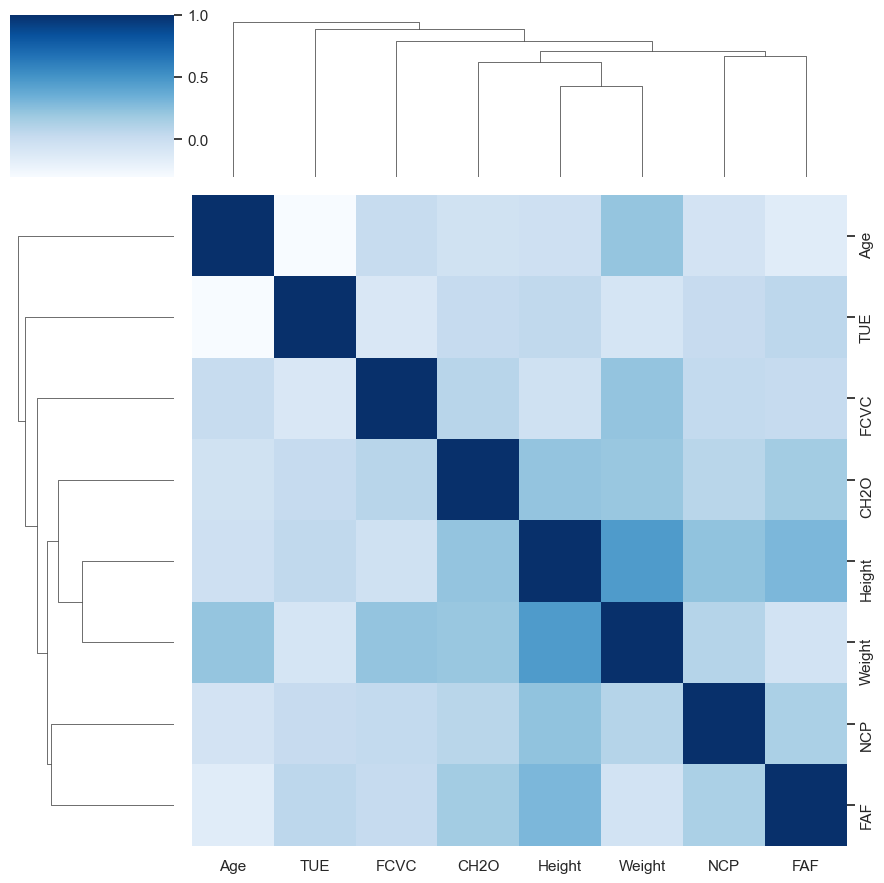

In [30]:
# Visualization of correlationship between the variables in the cont_data

sns.clustermap(cont_data.corr(),cmap='Blues', figsize=(9,9))
plt.tight_layout()
plt.show()


# As per exported cont_data correlation file and this chart, it is clear that no variable is correlated in cont_data.

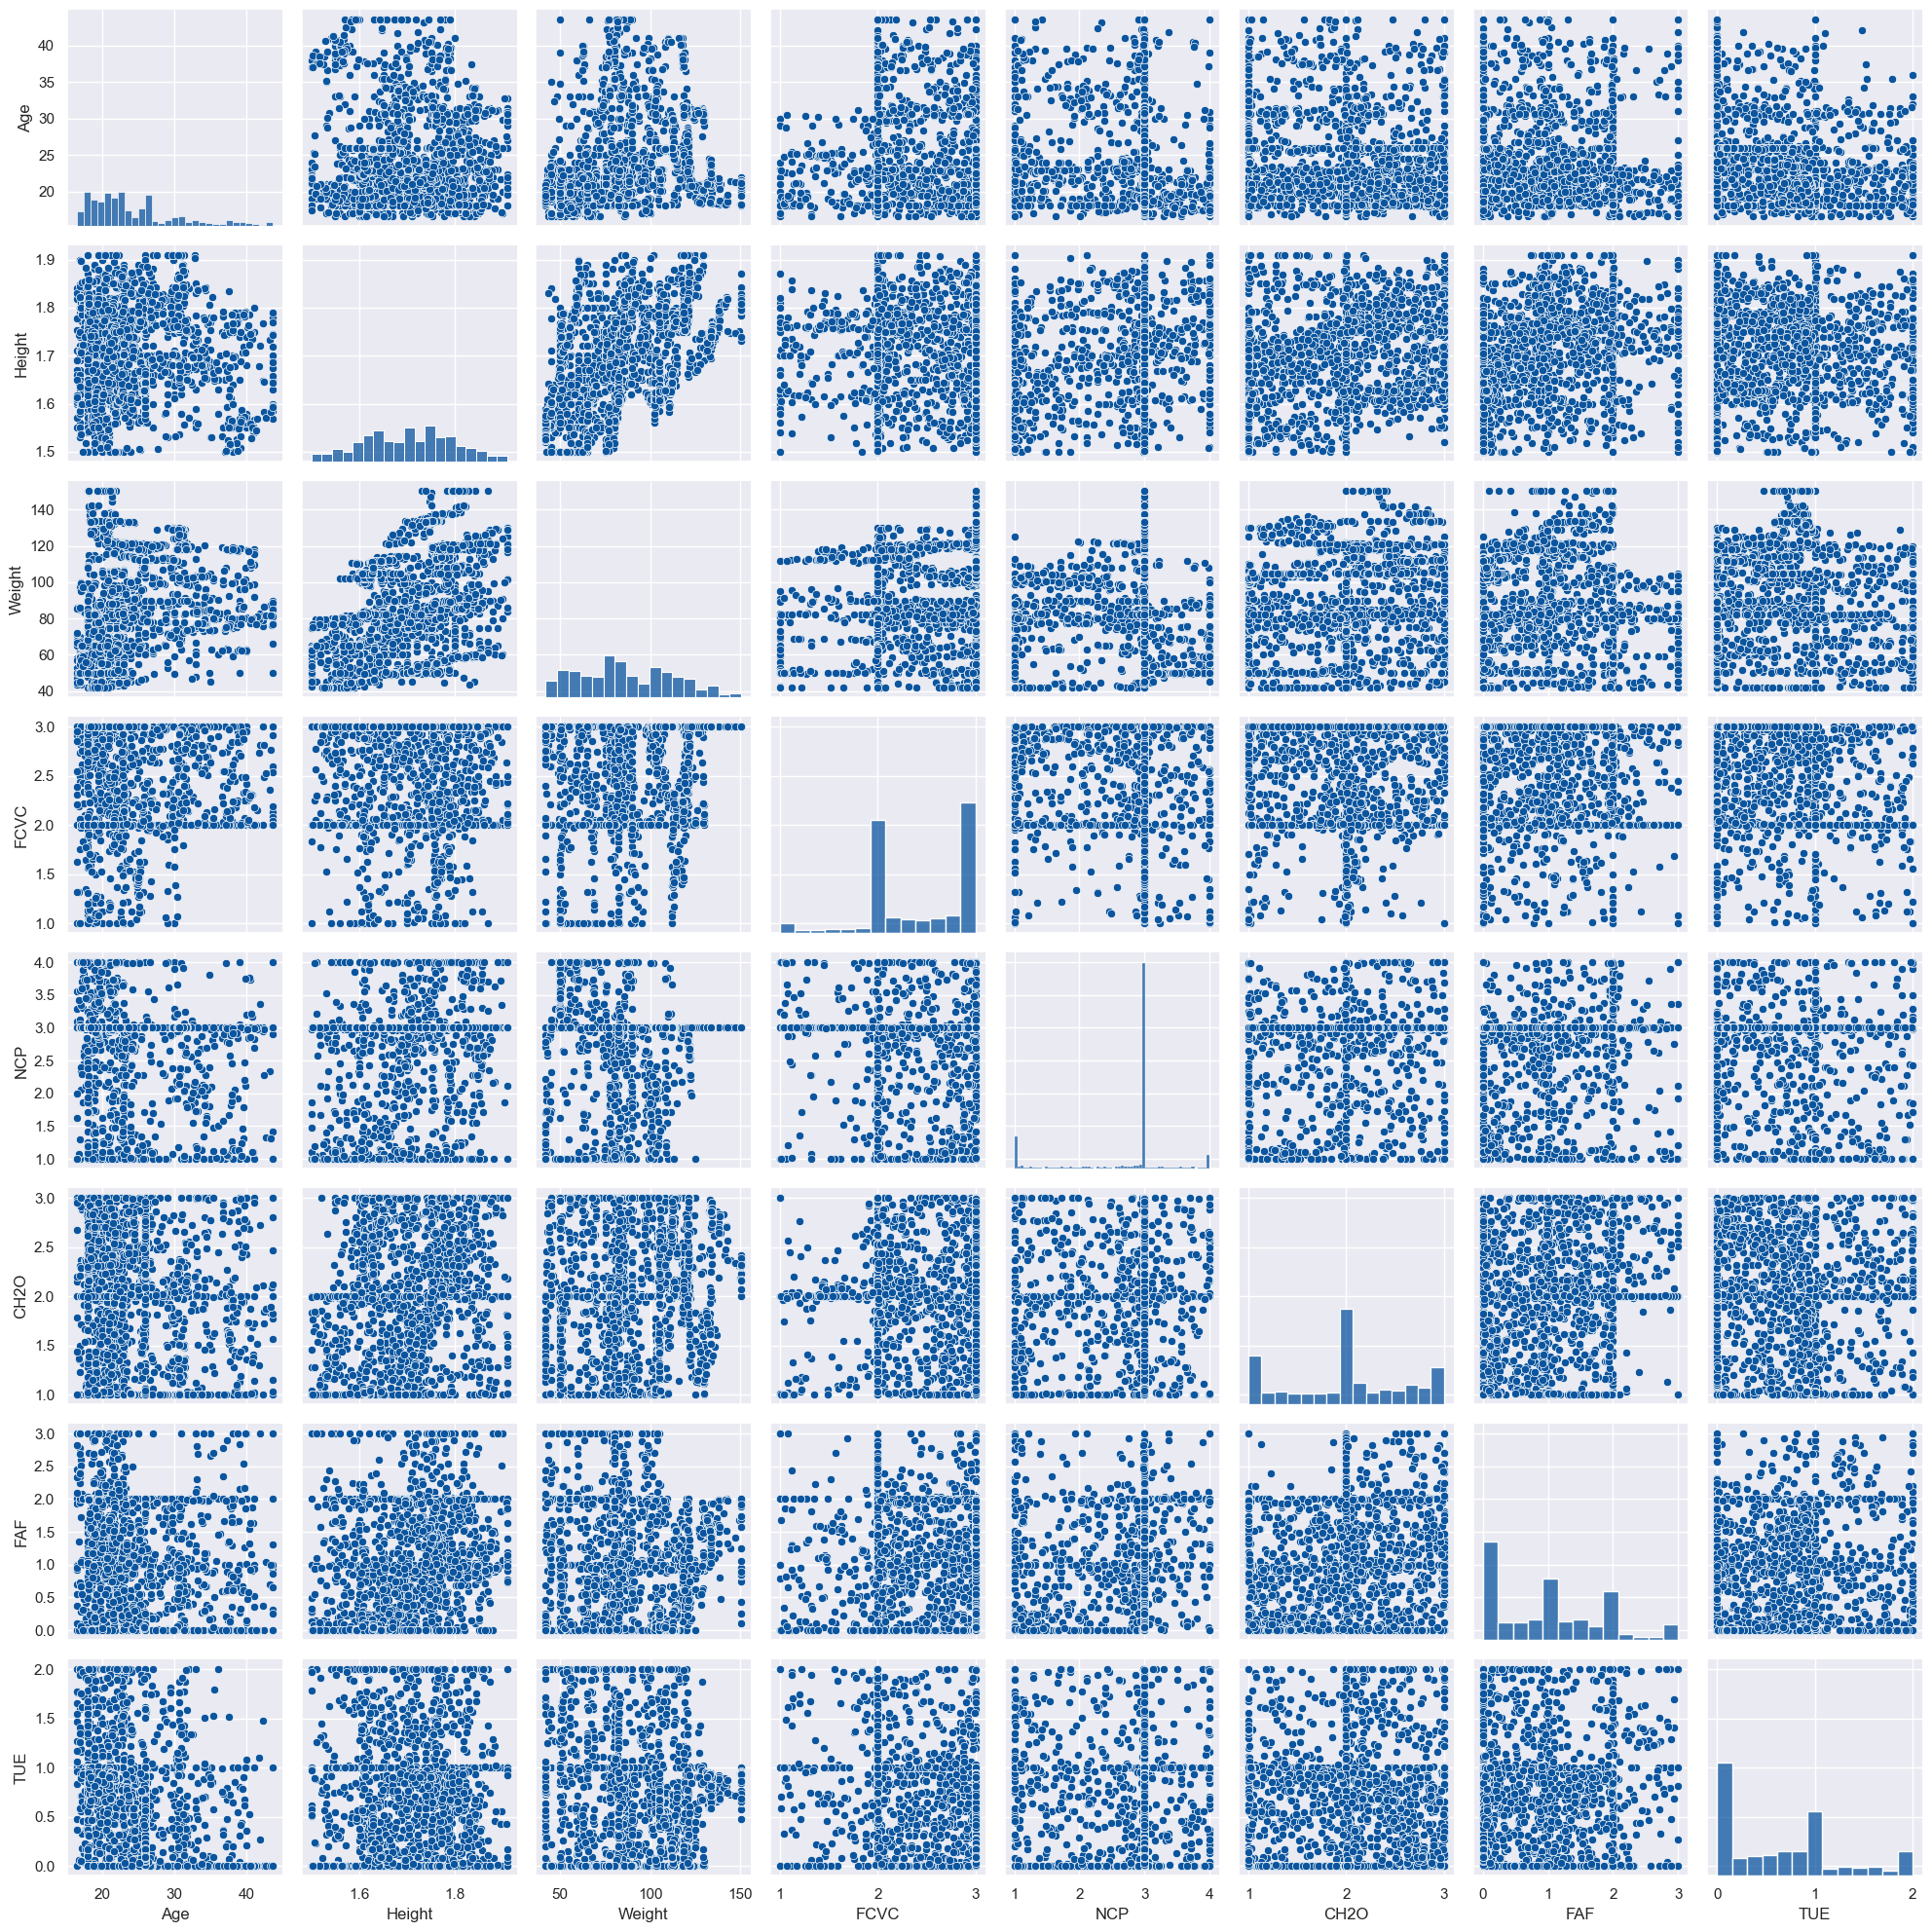

In [31]:
# Visualization of relation-ship of variables of cont_data amount themselves

sns.pairplot(cont_data)
plt.tight_layout()
plt.show()

In [32]:
# Exporting cat_data as csv file to keep a copy of cleaned cont_data.

cont_data.to_csv("C:/Users/navee/OneDrive/Desktop/Casestudy/Prediction_of_Obesity_Risk/Prediction_of_Obesity_Risk/cont_data.csv")

###### Concating the cat_data, cont_data and  y_variable to get a complete dataset.

In [33]:
# df without y_variable 

df = pd.concat([obs.NObeyesdad, cat_data, cont_data], axis=1)
df.head()

,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Normal_Weight,0,1,0,0,1,0,0,0,0,...,1,0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,Normal_Weight,0,1,0,0,1,0,1,1,0,...,1,0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,Normal_Weight,1,1,0,0,1,0,0,0,1,...,1,0,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,Overweight_Level_I,1,0,0,0,1,0,0,0,1,...,0,1,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,Overweight_Level_II,1,0,0,0,1,0,0,0,0,...,1,0,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [34]:
# df without y_variable for clustering 

df_1 = pd.concat([cat_data, cont_data], axis=1)
df_1.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,1,0,0,1,0,0,0,0,0,...,1,0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,0,1,0,0,1,0,1,1,0,1,...,1,0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,1,1,0,0,1,0,0,0,1,0,...,1,0,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,1,0,0,0,1,0,0,0,1,0,...,0,1,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,1,0,0,0,1,0,0,0,0,1,...,1,0,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [35]:
# Exporting df as csv file to keep a copy of cleaned df. (with y_variable)

df.to_csv("C:/Users/navee/OneDrive/Desktop/Casestudy/Prediction_of_Obesity_Risk/Prediction_of_Obesity_Risk/df.csv")

######

# -------------------------------------------Clustering-----------------------------------------------

#

### Standerdization of cont_data

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
std = StandardScaler()
std = std.fit_transform(cont_data)
std

array([[-0.53899761, -0.89244639, -0.87644794, ..., -0.00780979,
        -1.1869768 ,  0.55421113],
       [-0.53899761, -1.97296707, -1.18366732, ...,  1.63655215,
         2.32890842, -1.09050525],
       [-0.21210559,  1.05249084, -0.37721643, ..., -0.00780979,
         1.15694668,  0.55421113],
       ...,
       [-0.2899    ,  0.53606679,  1.79979206, ...,  0.08130311,
         0.47042204, -0.02754479],
       [ 0.01049742,  0.39823557,  1.78663113, ...,  1.39374402,
         0.14801302, -0.12664389],
       [-0.10346155,  0.39160117,  1.79146983, ...,  1.41211812,
         0.01598567,  0.08404757]])

### Dimension reduction using PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
# PCA creation with maximum components
# we will prune this after analysis on this

pca = PCA(n_components=cont_data.shape[1], random_state=42)
pca.fit(cont_data)

PCA(n_components=8, random_state=42)

In [40]:
print(dict(enumerate(pca.explained_variance_)))
print('')
print('_______________________________________')
print('')
print((pca.explained_variance_ > 0.8))


# Only first 2 pca columns are above 0.8


{0: 680.2001857440349, 1: 35.754497556177135, 2: 0.766388218823509, 3: 0.5403424420275248, 4: 0.34792798629822536, 5: 0.333159433680317, 6: 0.2580712122462755, 7: 0.005395860261447703}

_______________________________________

[ True  True False False False False False False]


In [41]:
print(dict(enumerate(pca.explained_variance_ratio_)))
print('_______________________________________')
print(pca.explained_variance_ratio_ >= 0.75)


# We can take only pc 1 pca columns are above 0.75


{0: 0.9470823351811611, 1: 0.04978306937933723, 2: 0.0010670869534455502, 3: 0.0007523502529378825, 4: 0.0004844403995240926, 5: 0.00046387728355652664, 6: 0.0003593275795270232, 7: 7.512970510487598e-06}
_______________________________________
[ True False False False False False False False]


In [42]:
# We can try pca both with 1 and 2 pca components, but i will try with both.

In [43]:
pca_final = PCA(n_components=2, random_state=42)
pca_final =pca_final.fit(cont_data)

In [44]:
pca_final_df = pd.DataFrame( pca_final.transform(cont_data), columns=['p1', 'p2'])

pca_final_df.head()

,p1,p2
0,-22.962868,-2.091880
1,-30.946627,-1.720660
2,-9.880227,-0.816266
3,0.320789,2.681261
4,2.850295,-2.386730


In [45]:
# Creating loading file for finding corr() between PCA variables and cont_data

loading = pd.DataFrame( ((pca_final.components_.T) * (np.sqrt(pca_final.explained_variance_))).T, 
                       columns=cont_data.columns).T

In [46]:
loading.columns = ['p1', 'p2']


loading

,p1,p2
Age,1.359882,5.966622
Height,0.042134,-0.012895
Weight,26.044400,-0.311588
FCVC,0.114964,-0.018118
NCP,0.069359,-0.065177
CH2O,0.123428,-0.058041
FAF,-0.050389,-0.126370
TUE,-0.050600,-0.180990


In [47]:
# Exporting loading to csv file for better analysis on excel


loading.to_csv("C:/Users/navee/OneDrive/Desktop/Casestudy/Prediction_of_Obesity_Risk/Prediction_of_Obesity_Risk/loading.csv")

In [48]:
# As per analysis on csv file, variable "Age" and "Weight" are most significant

cont_data_1 = cont_data[[ 'Age','Weight']]

cont_data_1.head()

,Age,Weight
0,21.0,64.0
1,21.0,56.0
2,23.0,77.0
3,27.0,87.0
4,22.0,89.8


## KMeans clustering -- for continuous variable

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [50]:
k_mean_sil_score = []
k_mean_inertia = []

for i in range(1, 9):
    k_mean = KMeans(n_clusters= i, init='k-means++', random_state=42 )
    k_mean.fit_predict(cont_data_1)
    k_mean_inertia.append(k_mean.inertia_)
    
    
for i in range(2, 9):
    k_mean = KMeans(n_clusters= i, init='k-means++', random_state=42 )
    k_mean.fit_predict(cont_data_1)
    k_mean_sil_score.append(silhouette_score(cont_data_1, k_mean.fit_predict(cont_data_1)))



print(dict({'k_value': list(range(1, 9)), 'k_mean_inertia': k_mean_inertia}))
print('__________________________')
print(dict({'k_value': list(range(2, 9)), 'k_mean_sil_score': k_mean_sil_score}))



{'k_value': [1, 2, 3, 4, 5, 6, 7, 8], 'k_mean_inertia': [1493280.9173097622, 474406.5890891736, 255393.85263245137, 174236.13956509816, 139281.618533251, 109848.58662394802, 83587.0797485592, 74590.8591835616]}
__________________________
{'k_value': [2, 3, 4, 5, 6, 7, 8], 'k_mean_sil_score': [0.5758918598077472, 0.5214213284853783, 0.49062753607810455, 0.4500292835430168, 0.474275004986645, 0.4746895722651077, 0.4456181222665442]}


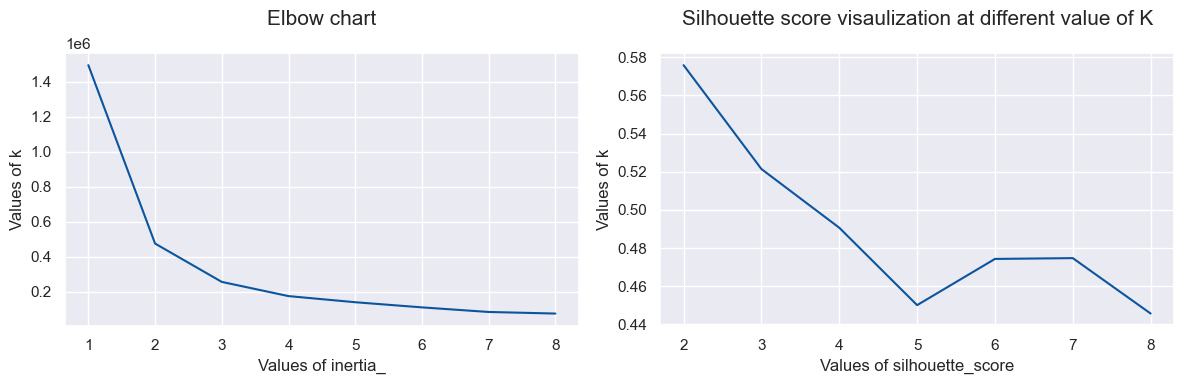

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax = ax.flatten()

sns.lineplot(x=list(range(1, 9)), y=k_mean_inertia, ax=ax[0])
ax[0].set_title("Elbow chart", fontsize=15, pad=20)
ax[0].set_ylabel('Values of k')
ax[0].set_xlabel('Values of inertia_')


sns.lineplot(x=list(range(2, 9)), y=k_mean_sil_score , ax=ax[1])
ax[1].set_title("Silhouette score visaulization at different value of K", pad=20, fontsize=15)
ax[1].set_ylabel('Values of k')
ax[1].set_xlabel('Values of silhouette_score')


plt.tight_layout()
plt.show()

###### As per the above charts:

1. Elbow chart shows that elbow is at the k_value = 2
2. Silhouette score chart shows that at k_value = 2,  silhouette_score is highest.
3. This means that k = 2 is the optimum value for KMeans clustering.
4. Data not only contains continuous variables but also categorical variable, Lets try clustering with categorical variables.

## KModes clustering -- for categorical variable

In [52]:
from kmodes.kmodes import KModes

In [53]:
k_modes_sil_score = []
k_modes_cost_ = []

for i in range(1, 9):
    k_modes = KModes(n_clusters= i, random_state=42 )
    k_modes.fit_predict(cat_data)
    k_modes_cost_.append(k_modes.cost_)
    
    
for i in range(2, 9):
    k_modes = KModes(n_clusters= i, random_state=42 )
    k_modes.fit_predict(cat_data)
    k_modes_sil_score.append(silhouette_score(cat_data, k_modes.labels_))



print(dict({'k_value': list(range(1, 9)), 'k_mean_inertia': k_modes_cost_}))
print('__________________________')
print(dict({'k_value': list(range(2, 9)), 'k_mean_sil_score': k_modes_sil_score}))

{'k_value': [1, 2, 3, 4, 5, 6, 7, 8], 'k_mean_inertia': [4397.0, 3727.0, 2761.0, 2513.0, 2345.0, 2290.0, 2315.0, 2122.0]}
__________________________
{'k_value': [2, 3, 4, 5, 6, 7, 8], 'k_mean_sil_score': [0.32207741133202966, 0.35134116283551614, 0.37485513537555654, 0.35537644366207816, 0.3586956218577073, 0.3507354805880664, 0.37122043392625087]}


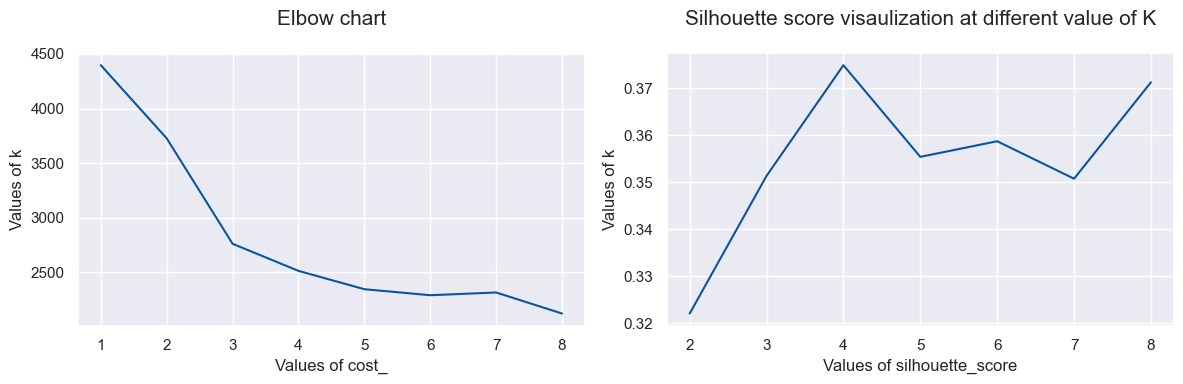

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax = ax.flatten()

sns.lineplot(x=list(range(1, 9)), y=k_modes_cost_, ax=ax[0])
ax[0].set_title("Elbow chart", fontsize=15, pad=20)
ax[0].set_ylabel('Values of k')
ax[0].set_xlabel('Values of cost_')


sns.lineplot(x=list(range(2, 9)), y=k_modes_sil_score , ax=ax[1])
ax[1].set_title("Silhouette score visaulization at different value of K", pad=20, fontsize=15)
ax[1].set_ylabel('Values of k')
ax[1].set_xlabel('Values of silhouette_score')


plt.tight_layout()
plt.show()

###### As per the above charts:
1. Elbow chart is not providing any significant visualization
2. Same condition with Silhouette score, it is also not providing any significant visualization
3. This might be because there are too many variables in "cat_data"
4. As there is no direct method to reduce variable of categorical data, domain knowledage plays significant role here.
5. Lets try again by reducing the variables in "cat_data"

In [55]:
## As there is no direct method to reduce variable of categorical data, domain knowledage plays significant role here.

# Reasons to drop variables:

# As per exported corr csv file of cat_data aslo CAEC_Sometimes and CAEC_Frequently are highly inversely corellated(-0.8)
# so dropping this.
# As per exported corr csv file, CALC_Sometimes and CALC_no are also highly inversely corellated(-0.9), dropping this too.
# Removing Gender as it might not impact the obesity level
# "family_history_with_overweight" is important variable but personal lifestyle choices and eating habbits may have a 
# larger impact on obesity levels then genetics.
# "FAVC" (Frequent consumption of high-caloric food ) is also vary important variable, so cannot drop this too.
# Consumption of food between meals might impact obesity level so it also cannot be dropped (CAEC).
# Smoking might not impact obesity level so can drop "SMOKE".
# Not sure about Calories consumption monitoring, so dropping SSC
# Consumption of alcohol (CALC) may impact obesity level but only 70 people (as per survey of over 2000 people) 
# consume alcohol frequently, can drop this too
# Mode of transportation might impact obesity level but ,most of the people travel by public transportation so 
# dropping these all variable might not have much impact.


# Keeping only 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Frequently' and 'CAEC_no' as variable for further KModes analysis.

In [56]:
cat_data_1= cat_data[[ 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Frequently','CAEC_no']]

cat_data_1

,FAVC_yes,CAEC_Frequently,CAEC_Frequently,CAEC_no
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2106,1,0,0,0
2107,1,0,0,0
2108,1,0,0,0
2109,1,0,0,0


In [57]:
k_modes_sil_score = []
k_modes_cost_ = []

for i in range(1, 9):
    k_modes = KModes(n_clusters= i, random_state=42 )
    k_modes.fit_predict(cat_data_1)
    k_modes_cost_.append(k_modes.cost_)
    
    
for i in range(2, 9):
    k_modes = KModes(n_clusters= i, random_state=42 )
    k_modes.fit_predict(cat_data_1)
    k_modes_sil_score.append(silhouette_score(cat_data_1, k_modes.fit_predict(cat_data_1)))



print(dict({'k_value': list(range(1, 9)), 'k_mean_inertia': k_modes_cost_}))
print('__________________________')
print(dict({'k_value': list(range(2, 9)), 'k_mean_sil_score': k_modes_sil_score}))

{'k_value': [1, 2, 3, 4, 5, 6, 7, 8], 'k_mean_inertia': [752.0, 280.0, 262.0, 94.0, 66.0, 0.0, 0.0, 0.0]}
__________________________
{'k_value': [2, 3, 4, 5, 6, 7, 8], 'k_mean_sil_score': [0.8561032650241637, 0.8240034601317041, 0.9413076315802148, 0.9676467775798995, 1.0, 1.0, 1.0]}


In [58]:
k_modes.cluster_centroids_

array([[0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 0]])

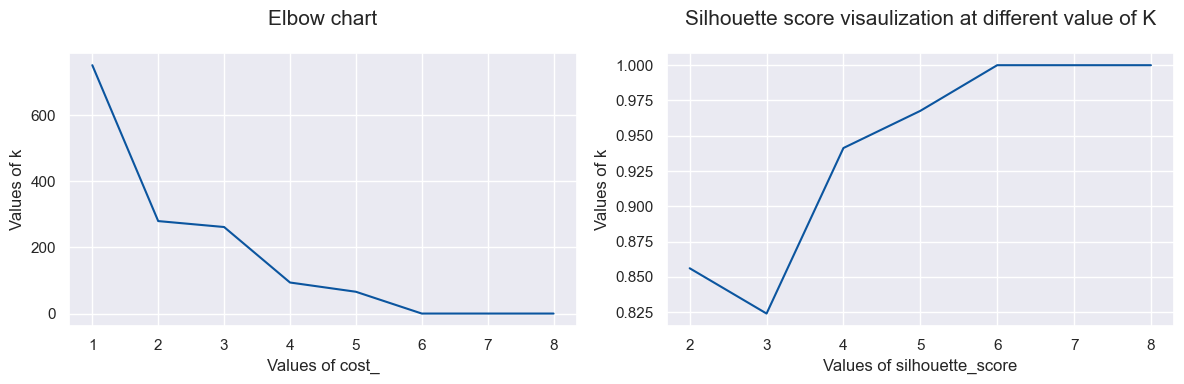

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax = ax.flatten()

sns.lineplot(x=list(range(1, 9)), y=k_modes_cost_, ax=ax[0])
ax[0].set_title("Elbow chart", fontsize=15, pad=20)
ax[0].set_ylabel('Values of k')
ax[0].set_xlabel('Values of cost_')


sns.lineplot(x=list(range(2, 9)), y=k_modes_sil_score , ax=ax[1])
ax[1].set_title("Silhouette score visaulization at different value of K", pad=20, fontsize=15)
ax[1].set_ylabel('Values of k')
ax[1].set_xlabel('Values of silhouette_score')


plt.tight_layout()
plt.show()

###### As per the above charts:
1. As per elbow chart, it is making an elbow at K-value = 2.
2. Silhouette score at k-value =2 is approx 0.74 which is good
3. We can observe that silhouette score is decreasing after k=2 and a jump can be seen after k-value = 4.
4. After these observations, we can conclude that k-value = is best for using KModes with variables 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Frequently' and 'CAEC_no.
5. Lets try with kprototype for Clustering as this dataset contains both categorical and contiunous variable in significant amount.

## KPrototypes clustering -- for both categorical and continuous variables

In [60]:
from kmodes.kprototypes import KPrototypes

In [61]:
kp_cost = []
kp_sil_sc = []
cat_cols_index_in_df = [i for i, j in enumerate(df_1) if j in list(cat_data.columns)]


for i in  range(1,8):
    
    kp = KPrototypes(n_clusters=i, random_state=42, n_jobs=-1)
    kp.fit(df_1, categorical=cat_cols_index_in_df)
    kp_cost.append(kp.cost_)
    


for i in  range(2,8):
    kp = KPrototypes(n_clusters=i, random_state=42, n_jobs=-1)
    kp_sil_sc.append(silhouette_score(df_1, kp.fit_predict(df_1, categorical=cat_cols_index_in_df)))
    



print('kp_cost :', kp_cost)
print('_____________________________')
print('kp_sil_sc :', kp_sil_sc)

kp_cost : [1507966.266886994, 488682.56868979207, 269383.10123153287, 187898.39286646037, 153057.7716138336, 122816.9765023809, 96596.89501313589]
_____________________________
kp_sil_sc : [0.5697582155119068, 0.5094351988663041, 0.4805984162819313, 0.4288174697960801, 0.4503541522931341, 0.446947342244103]


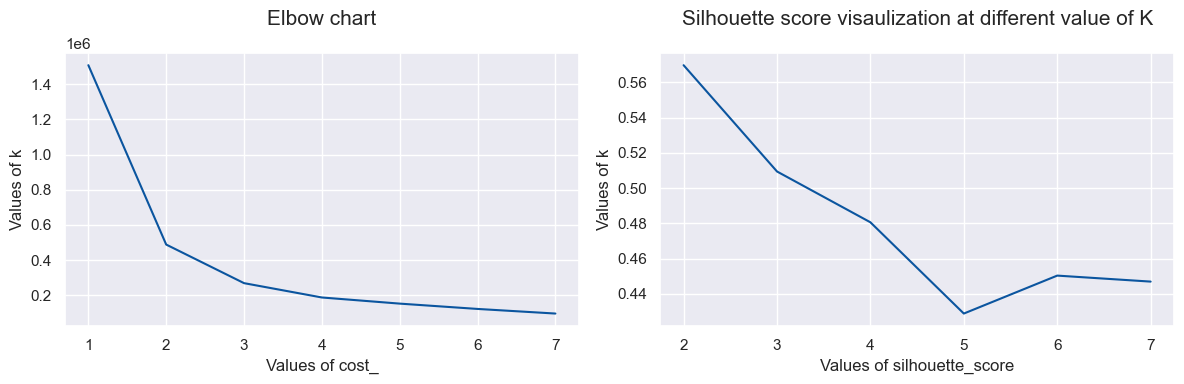

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ax = ax.flatten()

sns.lineplot(x=list(range(1, 8)), y=kp_cost, ax=ax[0])
ax[0].set_title("Elbow chart", fontsize=15, pad=20)
ax[0].set_ylabel('Values of k')
ax[0].set_xlabel('Values of cost_')


sns.lineplot(x=list(range(2, 8)), y=kp_sil_sc , ax=ax[1])
ax[1].set_title("Silhouette score visaulization at different value of K", pad=20, fontsize=15)
ax[1].set_ylabel('Values of k')
ax[1].set_xlabel('Values of silhouette_score')


plt.tight_layout()
plt.show()

###### As per the above charts:
1. As per elbow chart, it is making an elbow at K-value = 2.
2. Silhouette score at k-value =2 is approx 0.57 which is good.
3. We can observe that silhouette score k-value = 2 is highest and started after decresing that.
4. We can also try with reduced variables but as it is already giving a perfect elbow, we will not be itrating further.

In [63]:
# Further I will be using KPrototypes for clustering and k-vlaue will be 2, as it is most optimum value.

kp_final = KPrototypes(n_clusters=2, random_state=42, n_jobs=-1)
kp_final = kp_final.fit_predict(df_1, categorical=cat_cols_index_in_df)

print("kp_final :", kp_final)

kp_final : [1 1 1 ... 0 0 0]


In [64]:
# Dividing df into 2 clusters by using kp_final

kproto_df = pd.concat([df.reset_index().drop(columns='index'), pd.Series(kp_final)], axis=1)

kproto_df.head(1)

,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,...,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,0
0,Normal_Weight,0,1,0,0,1,0,0,0,0,...,0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1


In [65]:
# Correcting column names

kproto_df.columns = ['NObeyesdad', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'cluster']

In [66]:
# Dividing kproto_df clusterwise


cluster_0 = kproto_df[kproto_df.cluster == 0]
cluster_1 = kproto_df[kproto_df.cluster == 1]

In [67]:
# Resetting index in both clusters

cluster_0 = cluster_0.reset_index().drop(columns=['index','cluster'])
cluster_1 = cluster_1.reset_index().drop(columns=['index','cluster'])

In [68]:
cluster_0

,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Obesity_Type_I,1,1,1,1,0,0,0,0,0,...,1,0,26.000000,1.850000,105.000000,3.0,3.0,3.000000,2.000000,2.000000
1,Obesity_Type_I,1,0,1,0,1,0,0,0,1,...,0,0,41.000000,1.800000,99.000000,2.0,3.0,2.000000,2.000000,1.000000
2,Overweight_Level_II,1,1,1,0,1,0,0,0,0,...,1,0,27.000000,1.909117,102.000000,2.0,1.0,1.000000,1.000000,0.000000
3,Obesity_Type_I,1,1,1,0,0,0,0,0,1,...,0,0,23.000000,1.650000,95.000000,2.0,3.0,2.000000,0.000000,1.000000
4,Obesity_Type_II,1,1,1,0,0,1,1,1,1,...,0,0,30.000000,1.760000,112.000000,1.0,3.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,Obesity_Type_III,0,1,1,0,1,0,0,0,0,...,1,0,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
821,Obesity_Type_III,0,1,1,0,1,0,0,0,0,...,1,0,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
822,Obesity_Type_III,0,1,1,0,1,0,0,0,0,...,1,0,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
823,Obesity_Type_III,0,1,1,0,1,0,0,0,0,...,1,0,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [69]:
cluster_1

,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Normal_Weight,0,1,0,0,1,0,0,0,0,...,1,0,21.000000,1.620000,64.000000,2.000000,3.000000,2.000000,0.000000,1.000000
1,Normal_Weight,0,1,0,0,1,0,1,1,0,...,1,0,21.000000,1.520000,56.000000,3.000000,3.000000,3.000000,3.000000,0.000000
2,Normal_Weight,1,1,0,0,1,0,0,0,1,...,1,0,23.000000,1.800000,77.000000,2.000000,3.000000,2.000000,2.000000,1.000000
3,Overweight_Level_I,1,0,0,0,1,0,0,0,1,...,0,1,27.000000,1.800000,87.000000,3.000000,3.000000,2.000000,2.000000,0.000000
4,Overweight_Level_II,1,0,0,0,1,0,0,0,0,...,1,0,22.000000,1.780000,89.800000,2.000000,1.000000,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,Obesity_Type_I,1,1,1,0,1,0,0,0,0,...,0,0,27.968765,1.673767,89.995034,1.961069,3.000000,2.652327,0.569310,0.319008
1258,Obesity_Type_I,0,1,1,0,1,0,0,0,0,...,1,0,18.024744,1.617192,83.121811,2.976509,3.000000,1.022705,1.025690,0.313016
1259,Obesity_Type_I,0,1,1,0,1,0,0,0,0,...,1,0,18.106820,1.602129,82.412665,2.319648,3.000000,1.107164,0.692123,0.304020
1260,Obesity_Type_I,0,1,1,0,1,0,0,0,0,...,1,0,19.045357,1.612910,82.193405,1.261288,2.930044,1.166655,0.133398,0.951740


# 

# -----------------------------Classification on cluster_0-----------------------------------------

In [70]:
cluster_0.head()

,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Obesity_Type_I,1,1,1,1,0,0,0,0,0,...,1,0,26.0,1.850000,105.0,3.0,3.0,3.0,2.0,2.0
1,Obesity_Type_I,1,0,1,0,1,0,0,0,1,...,0,0,41.0,1.800000,99.0,2.0,3.0,2.0,2.0,1.0
2,Overweight_Level_II,1,1,1,0,1,0,0,0,0,...,1,0,27.0,1.909117,102.0,2.0,1.0,1.0,1.0,0.0
3,Obesity_Type_I,1,1,1,0,0,0,0,0,1,...,0,0,23.0,1.650000,95.0,2.0,3.0,2.0,0.0,1.0
4,Obesity_Type_II,1,1,1,0,0,1,1,1,1,...,0,0,30.0,1.760000,112.0,1.0,3.0,2.0,0.0,0.0


In [71]:
# value coding for y_variable "NObeyesdad" for further classification


cluster_0.NObeyesdad = np.where(cluster_0.NObeyesdad == 'Obesity_Type_I', 0, 
                                np.where(cluster_0.NObeyesdad == 'Overweight_Level_II', 1, 
                                         np.where(cluster_0.NObeyesdad == 'Obesity_Type_II', 2,3)))

cluster_0

,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,1,1,1,1,0,0,0,0,0,...,1,0,26.000000,1.850000,105.000000,3.0,3.0,3.000000,2.000000,2.000000
1,0,1,0,1,0,1,0,0,0,1,...,0,0,41.000000,1.800000,99.000000,2.0,3.0,2.000000,2.000000,1.000000
2,1,1,1,1,0,1,0,0,0,0,...,1,0,27.000000,1.909117,102.000000,2.0,1.0,1.000000,1.000000,0.000000
3,0,1,1,1,0,0,0,0,0,1,...,0,0,23.000000,1.650000,95.000000,2.0,3.0,2.000000,0.000000,1.000000
4,2,1,1,1,0,0,1,1,1,1,...,0,0,30.000000,1.760000,112.000000,1.0,3.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,3,0,1,1,0,1,0,0,0,0,...,1,0,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
821,3,0,1,1,0,1,0,0,0,0,...,1,0,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
822,3,0,1,1,0,1,0,0,0,0,...,1,0,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
823,3,0,1,1,0,1,0,0,0,0,...,1,0,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [72]:
# Dividing x and y variables

y0 = cluster_0.iloc[:, 0]
x0 = cluster_0.iloc[:, 1:]

### Significant variable selection

In [73]:
from sklearn.feature_selection import SelectKBest, f_classif

In [74]:
# Using SelectKBest to get the top 10 variables

skb_c0 = SelectKBest(score_func=f_classif, k=10)
skb_c0.fit_transform(x0, y0)

array([[1.      , 1.      , 0.      , ..., 3.      , 3.      , 2.      ],
       [1.      , 0.      , 0.      , ..., 2.      , 3.      , 2.      ],
       [1.      , 1.      , 0.      , ..., 2.      , 1.      , 1.      ],
       ...,
       [0.      , 1.      , 0.      , ..., 3.      , 3.      , 1.414209],
       [0.      , 1.      , 0.      , ..., 3.      , 3.      , 1.139107],
       [0.      , 1.      , 0.      , ..., 3.      , 3.      , 1.026452]])

In [75]:
skb0_vars = list(skb_c0.get_feature_names_out())

print("Top 10 variables as per SelectKBest :")
print(skb0_vars)

Top 10 variables as per SelectKBest :
['Gender_Male', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Public_Transportation', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'FAF']


In [76]:
# Creating formula_like to be used further

vif_form_0 = 'NObeyesdad ~ ' + ' + '.join(skb0_vars)

print('vif_form_0 : ',vif_form_0)

vif_form_0 :  NObeyesdad ~ Gender_Male + CALC_Sometimes + CALC_no + MTRANS_Public_Transportation + Age + Height + Weight + FCVC + NCP + FAF


### Removing multicollinearity from skb0_vars

In [77]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# After multiple iteration dropped 'CALC_Sometimes' and 'Gender_Male' to reduce multicollinearity

vif_form_0 = 'NObeyesdad ~ CALC_no + MTRANS_Public_Transportation + Age + Height + Weight + FCVC + NCP + FAF'

In [79]:
# Creating a empty dataframe

vif_0 = pd.DataFrame()

In [80]:
y0_dmatrix, x0_dimatrix = dmatrices(vif_form_0, cluster_0, return_type='dataframe')

In [81]:
vif_0['feature'] = x0_dimatrix.columns

In [82]:
vif_0['vif_factor'] = [variance_inflation_factor(x0_dimatrix.values, i) for i in range(x0_dimatrix.shape[1])]

In [83]:
vif_0

,feature,vif_factor
0,Intercept,1412.485664
1,CALC_no,1.637558
2,MTRANS_Public_Transportation,1.953390
3,Age,1.983601
4,Height,2.390041
5,Weight,2.167554
6,FCVC,2.057263
7,NCP,1.267318
8,FAF,1.471297


In [84]:
vif_0_list = list(vif_0.loc[1:, :].loc[vif_0.vif_factor <= 4].iloc[:, 0])


print(vif_0_list)

['CALC_no', 'MTRANS_Public_Transportation', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'FAF']


### Train-Test Split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
train_x_c0, test_x_c0, train_y_c0, test_y_c0 = train_test_split(x0[vif_0_list], y0, random_state=42, test_size=0.3) 

### Over sampling

In [87]:
# Checking data balanced or not

y0.value_counts()/y0.value_counts().sum()


# Data is imbalanced percent of value count for "Overweight_Level_II" is below 20%
# Dataset is already small so we cannot perform UnderSampling, insted we will perform OverSampling

NObeyesdad
3    0.392727
2    0.360000
0    0.204848
1    0.042424
Name: count, dtype: float64

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smote_0 = SMOTE(random_state=42)

In [90]:
train_x_c0, train_y_c0 = smote_0.fit_resample(train_x_c0, train_y_c0)

### Standerdization

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
std_0 = StandardScaler()

In [93]:
std_0.fit(train_x_c0)

StandardScaler()

In [94]:
train_x_c0 = pd.DataFrame(std_0.transform(train_x_c0), columns=vif_0_list)
train_x_c0.head()

,CALC_no,MTRANS_Public_Transportation,Age,Height,Weight,FCVC,NCP,FAF
0,2.11990,-1.407264,-0.593784,-1.461201,-1.244548,-2.187864,0.603500,-1.281455
1,-0.47172,0.710599,-0.103067,-2.040156,-0.312513,1.154339,0.603500,-1.339180
2,-0.47172,0.710599,-0.642132,0.689748,0.990816,-0.080715,0.418539,1.170011
3,-0.47172,-1.407264,0.861270,0.496713,-0.288495,-0.080723,-1.060256,0.055782
4,-0.47172,0.710599,-0.101700,-2.017632,-0.280064,1.154339,0.603500,-1.427718


In [95]:
test_x_c0 = pd.DataFrame(std_0.transform(test_x_c0), columns=vif_0_list)
test_x_c0.head()

,CALC_no,MTRANS_Public_Transportation,Age,Height,Weight,FCVC,NCP,FAF
0,-0.47172,0.710599,-1.115480,0.154286,3.324913,1.154339,0.603500,1.325152
1,2.11990,0.710599,-0.890282,-1.314511,-1.168805,-0.894808,0.562214,-1.427718
2,-0.47172,-1.407264,1.952293,0.805621,-1.319944,-0.894808,-1.689150,-0.030840
3,2.11990,0.710599,-0.643351,-0.855277,-1.109296,-0.894808,0.603500,0.011345
4,2.11990,-1.407264,0.826682,-0.548411,0.148575,-1.315242,2.183046,-0.493258


## Model Creation for cluster_0

##### Logistics Regression

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid_lr_0 = {'penalty':['l1', 'l2', 'elasticnet', None], 'C':[0.01,0.1, 0.5, 1.0] }

In [98]:
lr_0 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr_0, verbose=True, n_jobs=-1)

In [99]:
lr_0.fit(train_x_c0, train_y_c0)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             verbose=True)

In [100]:
lr_0.best_params_

{'C': 0.01, 'penalty': None}

In [101]:
lr_0.cv_results_

{'mean_fit_time': array([0.00239944, 0.03341079, 0.002806  , 0.04279904, 0.00220165,
        0.02424593, 0.00180058, 0.02346511, 0.00179915, 0.01409907,
        0.00102038, 0.0112967 , 0.00111556, 0.01650686, 0.00170283,
        0.01348996]),
 'std_fit_time': array([4.89395935e-04, 2.25237219e-03, 7.48914244e-04, 9.68450875e-03,
        4.02165675e-04, 8.52372084e-03, 3.97488847e-04, 5.20783353e-03,
        4.01522665e-04, 1.04140145e-03, 3.54403905e-05, 7.62957459e-04,
        1.41967323e-04, 3.70367202e-04, 5.86871667e-04, 5.13981797e-03]),
 'mean_score_time': array([0.        , 0.00522661, 0.        , 0.00460658, 0.        ,
        0.00321579, 0.        , 0.0033443 , 0.        , 0.00259995,
        0.        , 0.00311546, 0.        , 0.00267644, 0.        ,
        0.00246196]),
 'std_score_time': array([0.        , 0.00038988, 0.        , 0.00080333, 0.        ,
        0.00039129, 0.        , 0.00035953, 0.        , 0.00049047,
        0.        , 0.00044715, 0.        , 0.000402

In [102]:
lr_0_train_pred = pd.DataFrame({'y_actual': train_y_c0,'y_pred':lr_0.predict(train_x_c0)})
lr_0_test_pred = pd.DataFrame({'y_actual': test_y_c0,'y_pred':lr_0.predict(test_x_c0)})

#### Scoring

In [103]:
from sklearn.metrics import roc_auc_score, classification_report

In [104]:
# ROC_AUC score for train

roc_auc_score(lr_0_train_pred.y_actual, lr_0.predict_proba(train_x_c0), multi_class='ovr')

1.0

In [105]:
# Classification_report for train data:

print(classification_report(lr_0_train_pred.y_actual, lr_0_train_pred.y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       228
           3       1.00      1.00      1.00       228

    accuracy                           1.00       912
   macro avg       1.00      1.00      1.00       912
weighted avg       1.00      1.00      1.00       912



In [106]:
# Classification_report for test data:

print(classification_report(lr_0_test_pred.y_actual, lr_0_test_pred.y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       1.00      1.00      1.00        19
           2       0.99      0.99      0.99        86
           3       1.00      1.00      1.00        96

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



##### Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
param_grid_dt_0 = {'max_depth':[4,5,6,7], 'min_samples_split':[15, 20],  'min_samples_leaf':[30, 40], 'max_features':[5], 'max_leaf_nodes':[5,6,7] }

In [109]:
dt_0 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt_0, verbose=True, n_jobs=-1)

In [110]:
dt_0.fit(train_x_c0, train_y_c0)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7], 'max_features': [5],
                         'max_leaf_nodes': [5, 6, 7],
                         'min_samples_leaf': [30, 40],
                         'min_samples_split': [15, 20]},
             verbose=True)

In [111]:
dt_0.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 30,
 'min_samples_split': 15}

In [112]:
dt_0.cv_results_

{'mean_fit_time': array([0.00519972, 0.004601  , 0.00560064, 0.00499945, 0.00540009,
        0.00539851, 0.00540051, 0.00500178, 0.00519981, 0.00419784,
        0.00460005, 0.00439997, 0.00400128, 0.0041996 , 0.00440001,
        0.00379877, 0.00419993, 0.0037601 , 0.00413394, 0.00404139,
        0.00427041, 0.0041162 , 0.004004  , 0.00386534, 0.004141  ,
        0.00413909, 0.00386238, 0.00410438, 0.00367846, 0.00423694,
        0.00328674, 0.00344768, 0.00346212, 0.00300965, 0.00382323,
        0.00381136, 0.00361261, 0.00342073, 0.00341048, 0.00401134,
        0.00382671, 0.00420709, 0.00400028, 0.00430894, 0.00412431,
        0.00400062, 0.00440431, 0.00397363]),
 'std_fit_time': array([7.48443236e-04, 7.99181183e-04, 4.91205679e-04, 1.09667307e-03,
        4.90545160e-04, 4.86966198e-04, 4.90585298e-04, 6.31431737e-04,
        9.78568018e-04, 4.00426484e-04, 4.88912953e-04, 4.89635805e-04,
        7.47889859e-07, 4.01214044e-04, 8.00730734e-04, 3.99379385e-04,
        4.00094689e-0

In [113]:
dt_0_train_pred = pd.DataFrame({'y_actual': train_y_c0,'y_pred':dt_0.predict(train_x_c0)})
dt_0_test_pred = pd.DataFrame({'y_actual': test_y_c0,'y_pred':dt_0.predict(test_x_c0)})

#### Scoring

In [114]:
# ROC_AUC score for train

roc_auc_score(dt_0_train_pred.y_actual, dt_0.predict_proba(train_x_c0), multi_class='ovr')

0.9787835359597824

In [115]:
# Classification_report for train data:

print(classification_report(dt_0_train_pred.y_actual, dt_0_train_pred.y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       228
           1       0.99      0.99      0.99       228
           2       0.92      0.76      0.83       228
           3       0.96      0.97      0.97       228

    accuracy                           0.91       912
   macro avg       0.91      0.91      0.91       912
weighted avg       0.91      0.91      0.91       912



In [116]:
# Classification_report for test data:

print(classification_report(dt_0_test_pred.y_actual, dt_0_test_pred.y_pred))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        47
           1       1.00      0.89      0.94        19
           2       0.90      0.77      0.83        86
           3       1.00      0.95      0.97        96

    accuracy                           0.88       248
   macro avg       0.89      0.89      0.88       248
weighted avg       0.90      0.88      0.89       248



##### XGBoost

In [117]:
#!pip install xgboost

from xgboost import XGBClassifier

In [118]:
param_grid_xgb_0 = {'max_depth':[4,5,6], 'learning_rate':[0.01, 0.05, 0.1, 0.02, 0.5, 0.75, 1.0]}

In [119]:
xgb_0 = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb_0, verbose=True, n_jobs=-1, cv=5)

In [120]:
xgb_0.fit(train_x_c0, train_y_c0)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.02, 0.5, 0.75,
                                           1.0],
                         'max_depth': [4, 5, 6]},
             verbose=True)

In [121]:
xgb_0.best_params_

{'learning_rate': 1.0, 'max_depth': 4}

In [122]:
xgb_0.cv_results_

{'mean_fit_time': array([0.23096247, 0.2620749 , 0.2902041 , 0.21223869, 0.23999243,
        0.24959326, 0.19979291, 0.19000058, 0.21859784, 0.24459796,
        0.27840042, 0.27679853, 0.09699898, 0.09880056, 0.09959946,
        0.08639879, 0.08799934, 0.08920145, 0.0859868 , 0.07895207,
        0.073422  ]),
 'std_fit_time': array([0.02402822, 0.00971871, 0.01751937, 0.01468356, 0.01838824,
        0.00634531, 0.0278768 , 0.01313035, 0.03533614, 0.02349954,
        0.02600528, 0.00271518, 0.00502106, 0.00305984, 0.00492259,
        0.00249978, 0.00179043, 0.00213461, 0.00733554, 0.00368301,
        0.00570687]),
 'mean_score_time': array([0.00499821, 0.00519991, 0.00500083, 0.00540032, 0.0054018 ,
        0.00520072, 0.00619841, 0.0047977 , 0.00499973, 0.00500159,
        0.00539932, 0.00700188, 0.00439968, 0.00480075, 0.00500054,
        0.00419989, 0.00419974, 0.0041985 , 0.00379915, 0.00340037,
        0.00299888]),
 'std_score_time': array([8.79244276e-07, 4.00068052e-04, 2.231475

In [123]:
xgb_0_train_pred = pd.DataFrame({'y_actual': train_y_c0,'y_pred':xgb_0.predict(train_x_c0)})
xgb_0_test_pred = pd.DataFrame({'y_actual': test_y_c0,'y_pred':xgb_0.predict(test_x_c0)})

#### Scoring

In [124]:
# ROC_AUC score for train

roc_auc_score(xgb_0_train_pred.y_actual, xgb_0.predict_proba(train_x_c0), multi_class='ovr')

1.0

In [125]:
# Classification_report for train data:

print(classification_report(xgb_0_train_pred.y_actual, xgb_0_train_pred.y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       228
           3       1.00      1.00      1.00       228

    accuracy                           1.00       912
   macro avg       1.00      1.00      1.00       912
weighted avg       1.00      1.00      1.00       912



In [126]:
# Classification_report for test data:

print(classification_report(xgb_0_test_pred.y_actual, xgb_0_test_pred.y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        96

    accuracy                           1.00       248
   macro avg       0.99      0.99      0.99       248
weighted avg       1.00      1.00      1.00       248



# Analysis:

###### a. Logistics Regression:

    * Train accuracy = 0.79, Test accuracy = 0.77
    * roc_auc_score = 0.93
    * Best params = {'C': 0.01, 'penalty': None}
###### b. Decision Tree:

    * Train accuracy = 0.91, Test accuracy = 0.88
    * roc_auc_score = 0.97
    * Best params = {'max_depth': 4, 'max_features': 5, 'max_leaf_nodes': 7, 'min_samples_leaf': 30, 'min_samples_split': 15}

###### c. XGBoost:

    * Train accuracy = 1.00, Test accuracy = 1.00
    * roc_auc_score = 1.00
    * Best params = {'learning_rate': 1.0, 'max_depth': 4}
    

1. Based on above accuracy scores XGBoost is the best model for cluster_0.
2. Based on above roc_auc_score also, XGBoost is the best model for cluster_0.
3. Decision Tree is better in terms of accuracy as well as roc_auc_score then Logistics Regression. 




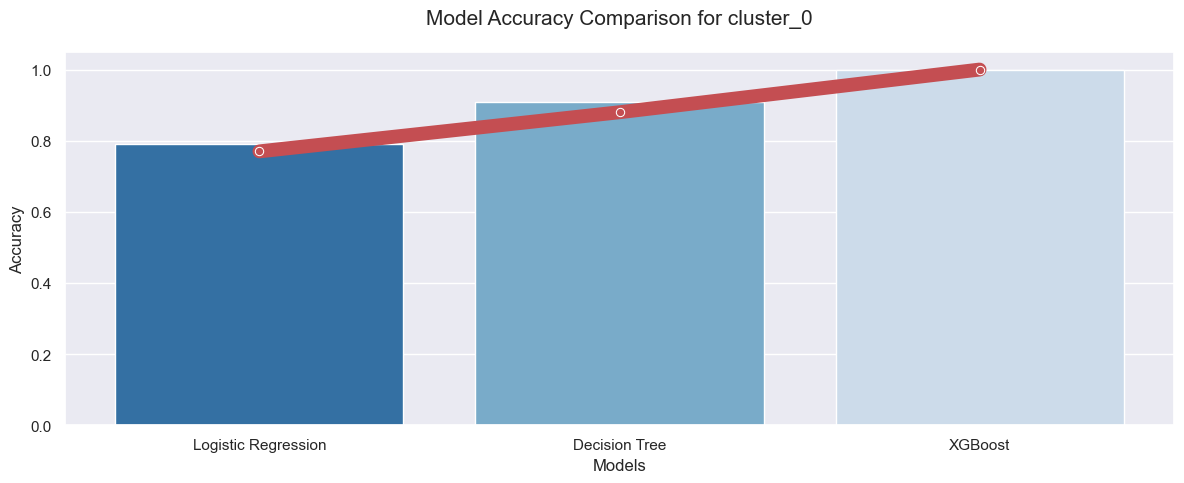

In [127]:
plt.figure(figsize=(12,5))

# For Train data (barplot)
bp = sns.barplot(x=['Logistic Regression', 'Decision Tree', 'XGBoost'], y=[0.79, 0.91, 1.00], palette='Blues_r')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for cluster_0', pad=20, fontdict={'fontsize':15})


# For Test data (lineplot)
lp = sns.lineplot(x=['Logistic Regression', 'Decision Tree', 'XGBoost'], y=[0.77, 0.88, 1.00],
             linewidth=10, color='r', marker='o')


plt.tight_layout()
plt.show()


# Lineplot is for Test data
# Barplot is for Train data

###### Drivers:


1. Consumption of alcohol: 
Excessive consumption of alcohol can contribute to obesity due to its high calorie content and potential to disrupt metabolism.

2. Mode of transportation (MTRANS_Public_Transportation): 
A reliance on public transportation may lead to decreased physical activity, potentially increasing the risk of obesity.

3. Age: 
Older age is associated with a slower metabolism and decreased muscle mass, making individuals more prone to obesity if dietary and activity levels are not adjusted accordingly.

4. Height: 
Height alone may not directly impact obesity level, but it can influence body composition and weight distribution, which are factors in determining obesity risk.

5. Weight: 
Higher weight increases the risk of obesity, as excess body fat is a key indicator of obesity and can lead to various health issues.

6. Frequency of consumption of vegetables: 
Regular consumption of vegetables, being low in calories and high in nutrients and fiber, can help in weight management and reducing the risk of obesity.

7. Number of main meals: 
Opting for a higher number of main meals can help regulate hunger and prevent overeating during any one meal, potentially aiding in weight control.

8. Physical activity frequency: 
Regular physical activity helps in burning calories, maintaining muscle mass, and regulating metabolism, all of which contribute to a lower risk of obesity when done consistently.






# 

# -----------------------------Classification on cluster_1-----------------------------------------

In [128]:
cluster_1.head()

,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Normal_Weight,0,1,0,0,1,0,0,0,0,...,1,0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,Normal_Weight,0,1,0,0,1,0,1,1,0,...,1,0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,Normal_Weight,1,1,0,0,1,0,0,0,1,...,1,0,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,Overweight_Level_I,1,0,0,0,1,0,0,0,1,...,0,1,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,Overweight_Level_II,1,0,0,0,1,0,0,0,0,...,1,0,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [129]:
# Unique values available in variable "NObeyesdad" in cluster_1.

cluster_1.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight'], dtype=object)

In [130]:
# value coding for y_variable "NObeyesdad" for further classification


cluster_1.NObeyesdad = np.where(cluster_1.NObeyesdad == 'Normal_Weight', 0, 
                                np.where(cluster_1.NObeyesdad == 'Overweight_Level_I', 1, 
                                         np.where(cluster_1.NObeyesdad == 'Overweight_Level_II', 2,np.where(cluster_1.NObeyesdad == 'Obesity_Type_I', 3,4))))

cluster_1

,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,0,1,0,0,1,0,0,0,0,...,1,0,21.000000,1.620000,64.000000,2.000000,3.000000,2.000000,0.000000,1.000000
1,0,0,1,0,0,1,0,1,1,0,...,1,0,21.000000,1.520000,56.000000,3.000000,3.000000,3.000000,3.000000,0.000000
2,0,1,1,0,0,1,0,0,0,1,...,1,0,23.000000,1.800000,77.000000,2.000000,3.000000,2.000000,2.000000,1.000000
3,1,1,0,0,0,1,0,0,0,1,...,0,1,27.000000,1.800000,87.000000,3.000000,3.000000,2.000000,2.000000,0.000000
4,2,1,0,0,0,1,0,0,0,0,...,1,0,22.000000,1.780000,89.800000,2.000000,1.000000,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,3,1,1,1,0,1,0,0,0,0,...,0,0,27.968765,1.673767,89.995034,1.961069,3.000000,2.652327,0.569310,0.319008
1258,3,0,1,1,0,1,0,0,0,0,...,1,0,18.024744,1.617192,83.121811,2.976509,3.000000,1.022705,1.025690,0.313016
1259,3,0,1,1,0,1,0,0,0,0,...,1,0,18.106820,1.602129,82.412665,2.319648,3.000000,1.107164,0.692123,0.304020
1260,3,0,1,1,0,1,0,0,0,0,...,1,0,19.045357,1.612910,82.193405,1.261288,2.930044,1.166655,0.133398,0.951740


In [131]:
# Dividing x and y variables

y1 = cluster_1.iloc[:, 0]
x1 = cluster_1.iloc[:, 1:]

In [132]:
y1.value_counts()

NObeyesdad
0    282
1    276
4    267
2    255
3    182
Name: count, dtype: int64

### Significant variable selection

In [133]:
from sklearn.feature_selection import SelectKBest, f_classif

In [134]:
# Using SelectKBest to get the top 10 variables

skb_c1 = SelectKBest(score_func=f_classif, k=10)
skb_c1.fit_transform(x1, y1)

array([[ 0.      ,  1.      ,  0.      , ...,  1.62    , 64.      ,
         3.      ],
       [ 0.      ,  1.      ,  0.      , ...,  1.52    , 56.      ,
         3.      ],
       [ 1.      ,  1.      ,  0.      , ...,  1.8     , 77.      ,
         3.      ],
       ...,
       [ 0.      ,  1.      ,  1.      , ...,  1.602129, 82.412665,
         3.      ],
       [ 0.      ,  1.      ,  1.      , ...,  1.61291 , 82.193405,
         2.930044],
       [ 0.      ,  1.      ,  1.      , ...,  1.605469, 82.039   ,
         3.      ]])

In [135]:
skb1_vars = list(skb_c1.get_feature_names_out())

print("Top 10 variables as per SelectKBest :")
print(skb1_vars)

Top 10 variables as per SelectKBest :
['Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CALC_no', 'Age', 'Height', 'Weight', 'NCP']


In [136]:
# Creating formula_like to be used further

vif_form_1 = 'NObeyesdad ~ ' + ' + '.join(skb1_vars)

print('vif_form_1 : ',vif_form_1)

vif_form_1 :  NObeyesdad ~ Gender_Male + family_history_with_overweight_yes + FAVC_yes + CAEC_Frequently + CAEC_Sometimes + CALC_no + Age + Height + Weight + NCP


### Removing multicollinearity from skb1_vars

In [137]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
# formula_like to be used further

vif_form_1 = 'NObeyesdad ~ Gender_Male + family_history_with_overweight_yes + FAVC_yes + CAEC_Frequently + CAEC_Sometimes + CALC_no + Age + Height + Weight + NCP'

In [139]:
# Creating a empty dataframe

vif_1 = pd.DataFrame()

In [140]:
y1_dmatrix, x1_dimatrix = dmatrices(vif_form_1, cluster_1, return_type='dataframe')

In [141]:
vif_1['feature'] = x1_dimatrix.columns

In [142]:
vif_1['vif_factor'] = [variance_inflation_factor(x1_dimatrix.values, i) for i in range(x1_dimatrix.shape[1])]

In [143]:
vif_1

,feature,vif_factor
0,Intercept,616.257186
1,Gender_Male,1.843956
2,family_history_with_overweight_yes,1.355919
3,FAVC_yes,1.066622
4,CAEC_Frequently,3.231099
5,CAEC_Sometimes,3.184739
6,CALC_no,1.045355
7,Age,1.269322
8,Height,2.050068
9,Weight,1.988392


In [144]:
vif_1_list = list(vif_1.loc[1:, :].loc[vif_1.vif_factor <= 4].iloc[:, 0])


print(vif_1_list)

['Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CALC_no', 'Age', 'Height', 'Weight', 'NCP']


### Train-Test Split

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
train_x_c1, test_x_c1, train_y_c1, test_y_c1 = train_test_split(x1[vif_1_list], y1, random_state=42, test_size=0.3) 

### Over sampling

In [147]:
# Checking data balanced or not

y1.value_counts()/y1.value_counts().sum()


# Data is imbalanced percent of value count for "Obesity_Type_I" is below 20%
# Dataset is already small so we cannot perform UnderSampling, insted we will perform OverSampling.

NObeyesdad
0    0.223455
1    0.218700
4    0.211569
2    0.202060
3    0.144216
Name: count, dtype: float64

In [148]:
from imblearn.over_sampling import SMOTE

In [149]:
smote_1 = SMOTE(random_state=42)

In [150]:
train_x_c1, train_y_c1 = smote_1.fit_resample(train_x_c1, train_y_c1)

### Standerdization

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
std_1 = StandardScaler()

In [153]:
std_1.fit(train_x_c1)

StandardScaler()

In [154]:
train_x_c1 = pd.DataFrame(std_1.transform(train_x_c1), columns=vif_1_list)
train_x_c1.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CALC_no,Age,Height,Weight,NCP
0,-0.809842,-1.654166,0.46603,2.284625,-1.848130,-0.788430,-0.704188,-1.480927,-1.935083,-1.256830
1,-0.809842,0.604534,0.46603,-0.437709,0.541087,1.268344,-0.119126,-0.467247,1.019126,0.409424
2,-0.809842,-1.654166,0.46603,-0.437709,0.541087,-0.788430,-0.590932,-1.451105,-0.355240,0.082379
3,1.234809,0.604534,0.46603,-0.437709,0.541087,1.268344,-0.986901,2.565392,-0.691125,0.834400
4,-0.809842,-1.654166,0.46603,2.284625,-1.848130,-0.788430,-0.524955,-1.342601,-1.751441,0.292794


In [155]:
test_x_c1 = pd.DataFrame(std_1.transform(test_x_c1), columns=vif_1_list)
test_x_c1.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CALC_no,Age,Height,Weight,NCP
0,-0.809842,0.604534,0.46603,-0.437709,0.541087,1.268344,-0.141414,-0.004638,1.093534,-0.920172
1,1.234809,0.604534,0.46603,-0.437709,0.541087,1.268344,0.361857,1.109541,0.893771,0.584015
2,1.234809,0.604534,0.46603,-0.437709,0.541087,1.268344,-0.965867,1.693912,-0.800257,1.571051
3,-0.809842,-1.654166,0.46603,2.284625,-1.848130,1.268344,-1.055847,-1.349918,-1.726541,0.451946
4,-0.809842,-1.654166,0.46603,-0.437709,0.541087,-0.788430,-0.850454,-0.559480,-1.378971,0.451946


## Model Creation for cluster_1

##### Naive_bayes

In [156]:
from sklearn.naive_bayes import GaussianNB

In [157]:
param_grid = {'var_smoothing': [1e-9, 1e-7, 1e-5]}

In [158]:
gnb_1 = GridSearchCV(GaussianNB(), param_grid, cv=5, n_jobs=-1)
gnb_1.fit(train_x_c0, train_y_c0)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-07, 1e-05]})

In [159]:
gnb_1.best_params_

{'var_smoothing': 1e-05}

In [160]:
gnb_1_train_pred = pd.DataFrame({'y_actual': train_y_c0,'y_pred':gnb_1.predict(train_x_c0)})
gnb_1_test_pred = pd.DataFrame({'y_actual': test_y_c0,'y_pred':gnb_1.predict(test_x_c0)})

#### Scoring

In [161]:
from sklearn.metrics import roc_auc_score, classification_report

In [162]:
# ROC_AUC score for train

roc_auc_score(gnb_1_train_pred.y_actual, gnb_1.predict_proba(train_x_c0), multi_class='ovr')

0.9722126038781165

In [163]:
# Classification_report for train data:

print(classification_report(gnb_1_train_pred.y_actual, gnb_1_train_pred.y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       228
           1       0.91      1.00      0.95       228
           2       0.87      0.82      0.84       228
           3       0.93      1.00      0.96       228

    accuracy                           0.88       912
   macro avg       0.88      0.88      0.88       912
weighted avg       0.88      0.88      0.88       912



In [164]:
# Classification_report for test data:

print(classification_report(gnb_1_test_pred.y_actual, gnb_1_test_pred.y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69        47
           1       0.89      0.89      0.89        19
           2       0.88      0.84      0.86        86
           3       0.97      1.00      0.98        96

    accuracy                           0.88       248
   macro avg       0.86      0.86      0.86       248
weighted avg       0.88      0.88      0.88       248



##### K-nearest neighbor

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
param_grid_knn_1 = {'n_neighbors':[3,4,5,6,7], 'leaf_size':[15, 20, 25, 30],  'p':[1,2] }

In [167]:
knn_1 = GridSearchCV(KNeighborsClassifier(), param_grid_knn_1, verbose=True, n_jobs=-1)

In [168]:
knn_1.fit(train_x_c1, train_y_c1)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [15, 20, 25, 30],
                         'n_neighbors': [3, 4, 5, 6, 7], 'p': [1, 2]},
             verbose=True)

In [169]:
knn_1.best_params_

{'leaf_size': 15, 'n_neighbors': 3, 'p': 1}

In [170]:
knn_1_train_pred = pd.DataFrame({'y_actual': train_y_c1,'y_pred':knn_1.predict(train_x_c1)})
knn_1_test_pred = pd.DataFrame({'y_actual': test_y_c1,'y_pred':knn_1.predict(test_x_c1)})

#### Scoring

In [171]:
# ROC_AUC score for train

roc_auc_score(knn_1_train_pred.y_actual, knn_1.predict_proba(train_x_c1), multi_class='ovr')

0.994998918685121

In [172]:
# Classification_report for train data:

print(classification_report(knn_1_train_pred.y_actual, knn_1_train_pred.y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       204
           1       0.93      0.88      0.91       204
           2       0.94      0.92      0.93       204
           3       0.98      0.98      0.98       204
           4       0.94      0.97      0.95       204

    accuracy                           0.93      1020
   macro avg       0.93      0.93      0.93      1020
weighted avg       0.93      0.93      0.93      1020



In [173]:
# Classification_report for test data:

print(classification_report(knn_1_test_pred.y_actual, knn_1_test_pred.y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73        95
           1       0.82      0.69      0.75        72
           2       0.83      0.90      0.86        81
           3       0.98      0.94      0.96        50
           4       0.87      0.90      0.88        81

    accuracy                           0.83       379
   macro avg       0.84      0.83      0.84       379
weighted avg       0.83      0.83      0.82       379



##### RandomForest Classifier

In [174]:
#!pip install xgboost

from sklearn.ensemble import RandomForestClassifier

In [175]:
param_grid_rf_1 = {'max_depth':[4,5,6,7], 'min_samples_split':[15, 20],  'min_samples_leaf':[30, 40], 'max_features':[5], 'max_leaf_nodes':[5,6,7] }

In [176]:
rf_1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf_1, verbose=True, n_jobs=-1, cv=5)

In [177]:
rf_1.fit(train_x_c1, train_y_c1)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7], 'max_features': [5],
                         'max_leaf_nodes': [5, 6, 7],
                         'min_samples_leaf': [30, 40],
                         'min_samples_split': [15, 20]},
             verbose=True)

In [178]:
rf_1.best_params_

{'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 30,
 'min_samples_split': 15}

In [179]:
rf_1_train_pred = pd.DataFrame({'y_actual': train_y_c1,'y_pred':rf_1.predict(train_x_c1)})
rf_1_test_pred = pd.DataFrame({'y_actual': test_y_c1,'y_pred':rf_1.predict(test_x_c1)})

#### Scoring

In [180]:
# ROC_AUC score for train

roc_auc_score(rf_1_train_pred.y_actual, rf_1.predict_proba(train_x_c1), multi_class='ovr')

0.9644427623990774

In [181]:
# Classification_report for train data:

print(classification_report(rf_1_train_pred.y_actual, rf_1_train_pred.y_pred))

              precision    recall  f1-score   support

           0       0.86      0.59      0.70       204
           1       0.67      0.72      0.69       204
           2       0.70      0.69      0.69       204
           3       0.87      0.93      0.90       204
           4       0.83      0.99      0.90       204

    accuracy                           0.78      1020
   macro avg       0.79      0.78      0.78      1020
weighted avg       0.79      0.78      0.78      1020



In [182]:
# Classification_report for test data:

print(classification_report(rf_1_test_pred.y_actual, rf_1_test_pred.y_pred))

              precision    recall  f1-score   support

           0       0.84      0.55      0.66        95
           1       0.55      0.60      0.57        72
           2       0.64      0.69      0.66        81
           3       0.79      0.90      0.84        50
           4       0.83      0.96      0.89        81

    accuracy                           0.72       379
   macro avg       0.73      0.74      0.73       379
weighted avg       0.73      0.72      0.72       379



##### XGBoost

In [183]:
param_grid_xgb_1 = {'max_depth':[4,5,6], 'learning_rate':[0.01, 0.05, 0.1, 0.02, 0.5, 0.75, 1.0]}

In [184]:
xgb_1 = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb_1, verbose=True, n_jobs=-1, cv=5)

In [185]:
xgb_1.fit(train_x_c1, train_y_c1)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.02, 0.5, 0.75,
                                           1.0],
                         'max_depth': [4, 5, 6]},
             verbose=True)

In [186]:
xgb_1.best_params_

{'learning_rate': 0.5, 'max_depth': 4}

In [187]:
xgb_1_train_pred = pd.DataFrame({'y_actual': train_y_c1,'y_pred':xgb_1.predict(train_x_c1)})
xgb_1_test_pred = pd.DataFrame({'y_actual': test_y_c1,'y_pred':xgb_1.predict(test_x_c1)})

#### Scoring

In [188]:
# ROC_AUC score for train

roc_auc_score(xgb_1_train_pred.y_actual, xgb_1.predict_proba(train_x_c1), multi_class='ovr')

1.0

In [189]:
# Classification_report for train data:

print(classification_report(xgb_1_train_pred.y_actual, xgb_1_train_pred.y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       204
           3       1.00      1.00      1.00       204
           4       1.00      1.00      1.00       204

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020



In [190]:
# Classification_report for test data:

print(classification_report(xgb_1_test_pred.y_actual, xgb_1_test_pred.y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        95
           1       0.89      0.94      0.92        72
           2       0.97      0.95      0.96        81
           3       0.98      0.96      0.97        50
           4       0.98      0.99      0.98        81

    accuracy                           0.96       379
   macro avg       0.96      0.96      0.96       379
weighted avg       0.96      0.96      0.96       379



# Analysis:

###### a. Naive_bayes (GaussianNB):

    * Train accuracy = 0.88, Test accuracy = 0.89
    * roc_auc_score = 0.97
    * Best params = {'var_smoothing': 1e-07}
    
###### b. KNeighborsClassifier:

    * Train accuracy = 0.93, Test accuracy = 0.83
    * roc_auc_score = 0.99
    * Best params = {'leaf_size': 15, 'n_neighbors': 3, 'p': 1}


###### c. RandomForestClassifier:

    * Train accuracy = 0.78, Test accuracy = 0.72
    * roc_auc_score = 0.96
    * Best params = {'max_depth': 5, 'max_features': 5, 'max_leaf_nodes': 7, 'min_samples_leaf': 30, 'min_samples_split': 15}

###### d. XGBoost:

    * Train accuracy = 1.00, Test accuracy = 0.96
    * roc_auc_score = 1.00
    * Best params = {'learning_rate': 0.5, 'max_depth': 4}

    

1. Based on above accuracy scores XGBoost is the best model for cluster_1.
2. Based on above roc_auc_score also, XGBoost is the best model for cluster_1.
3. RandomForestClassifier is worst performing model among all.
4. KNeighborsClassifier is overfitted model.
5. Naive_bayes is having good overall score in terms of accuracy and roc_auc_score.

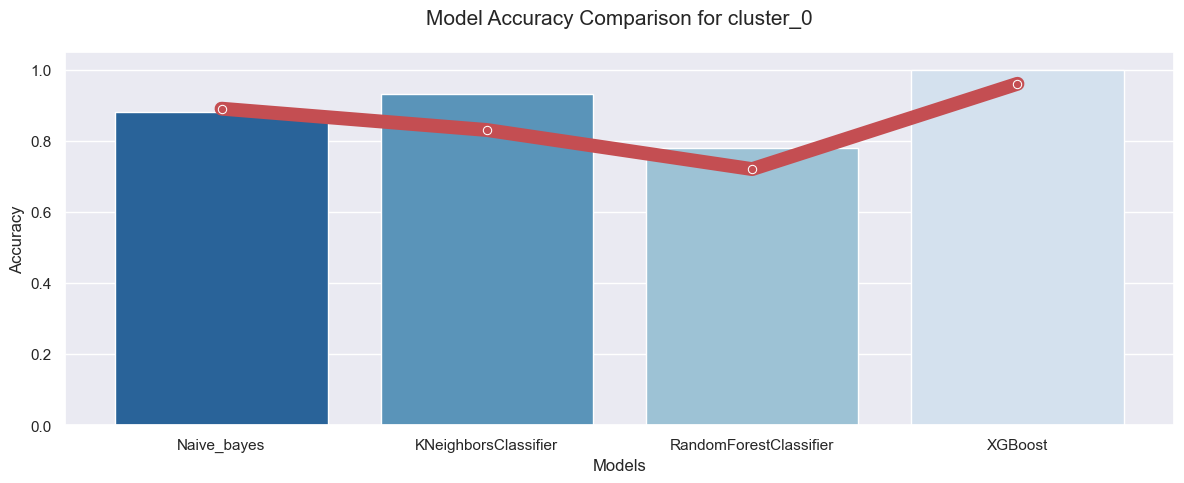

In [191]:
plt.figure(figsize=(12,5))

# For Train data (barplot)
bp = sns.barplot(x=['Naive_bayes', 'KNeighborsClassifier', 'RandomForestClassifier', 'XGBoost'], 
                 y=[0.88, 0.93, 0.78, 1.00], palette='Blues_r')
plt.xlabel('Models')
plt.ylabel('Accuracy')


# For Test data (lineplot)
lp = sns.lineplot(x=['Naive_bayes', 'KNeighborsClassifier', 'RandomForestClassifier', 'XGBoost'], 
                  y=[0.89, 0.83, 0.72, 0.96],
             linewidth=10, color='r', marker='o')

plt.title('Model Accuracy Comparison for cluster_0', fontdict={'fontsize':15}, pad=20)
plt.tight_layout()
plt.show()


# Lineplot is for Test data
# Barplot is for Train data

###### Drivers:


1. Gender: 
Gender can influence obesity due to variations in metabolism, hormonal factors, and societal norms regarding body image and dietary habits.

2. Family history with overweight: 
A family history of overweight or obesity can increase the likelihood of obesity through genetic predispositions and shared lifestyle factors within families.

3. Age: 
Older age is associated with a slower metabolism and decreased muscle mass, making individuals more prone to obesity if dietary and activity levels are not adjusted accordingly.

4. Height: 
Height alone may not directly impact obesity level, but it can influence body composition and weight distribution, which are factors in determining obesity risk.

5. Weight: 
Higher weight increases the risk of obesity, as excess body fat is a key indicator of obesity and can lead to various health issues.

6. Frequent consumption of high-caloric food: 
Regular consumption of high-caloric foods can lead to weight gain and obesity by providing excess calories without adequate nutrition.

7. Number of main meals: 
Opting for a higher number of main meals can help regulate hunger and prevent overeating during any one meal, potentially aiding in weight control.

8. Consumption of food between meals: 
Eating between meals can contribute to obesity by increasing overall calorie intake and disrupting hunger signals, leading to overeating.

9. Consumption of alcohol: 
Alcohol consumption can contribute to obesity due to its high calorie content, potential to disrupt metabolism, and association with unhealthy eating habits.








#

#

# -----------------Exploratory Data Analysis and Modeling Approach for----------------------------------------------------Obesity Prediction: A Case Study---------------------------------




### Data Cleaning and Clustering:
The initial phase of the case study involved data cleaning to ensure data integrity. Following this, clustering algorithms including KMeans, KModes, and KPrototypes were applied to identify distinct clusters within the dataset. The data was then divided into two clusters, namely Cluster 0 and Cluster 1, based on the outcomes of the KPrototypes model.

### Variable Selection and Multicollinearity Removal:
For both Cluster 0 and Cluster 1, variable selection techniques were employed to identify the most relevant features for modeling. Additionally, measures were taken to address multicollinearity issues, ensuring that the selected variables provided unique information to the models.

#### Train-Test Split, Standardization, and Oversampling:
Following variable selection and multicollinearity removal, the data for both clusters was split into training and testing sets. Standardization techniques were applied to scale the data appropriately. Moreover, oversampling methods were utilized to address any class imbalance present within the dataset.

### Modeling on Cluster 0:
For Cluster 0, several classification models were trained and evaluated. These included:

1. Logistics Regression
2. Decision Tree
3. XGBoost

### Modeling on Cluster 1:
Similarly, for Cluster 1, the following classification models were implemented:

1. Naive Bayes
2. K-Nearest Neighbor
3. Random Forest
4. XGBoost

### Conclusion:
Through the rigorous application of data preprocessing techniques and various classification models, insights were gained into the underlying patterns within the dataset. The performance of each model on both Cluster 0 and Cluster 1 provided valuable information for further analysis and decision-making processes. The results obtained from this study serve as a foundation for addressing obesity-related concerns and developing targeted interventions to promote healthier lifestyles.

# -------------------------------------------------END--------------------------------------------------------